# Earlier test block

In [4]:
%run -i 'STEP1_scraping_cleaning_merge.py'
d1 = scrape(initial_panel='202002',
            current_panel='202104'
                ).open_initial_panel_data(
                ).get_appids_from_initial_panel_data(
                ).scraping_apps_according_to_id()

202002  first panel contains  8042  IDs.


In [3]:
dlist = d1.id_list
type(dlist)
for i in dlist:
    print(i)
print(len(dlist))
d2list = list(dlist)
d3list = [i for sublist in d2list for i in sublist]

['com.finazzi.distquake', 'com.honeyponey.bubbletea', 'com.thomasbowker.lynerelease', 'com.planeth.rhythm', 'com.PSV.Baby_Cooking_School', 'com.candyrufusgames.survivalcraft2', 'com.biogen.cleo.us', 'com.exatools.skitracker', 'com.tribeplay.pandaspace', 'com.sbi.SBIFreedomPlus', 'com.plarium.vikings', 'com.whaleapp.hotelblast', 'com.noodlecake.punchquest', 'com.zvooq.openplay', 'com.solou.catendless.run', 'com.popularapp.periodcalendar', 'com.philseven.loyalty', 'com.fifa.fifaapp.android', 'com.pixel.coloring.color.by.number', 'com.snagajob.jobseeker', 'com.wordsmobile.golfchampionship', 'com.mcprohosting.beam', 'com.tiimoapp.androidapp', 'com.chuchutv.android', 'com.mapmyride.android2', 'com.bluewizard.slayawaycamp', 'com.lucky.notewidget', 'com.infinitewallpapers.popular.brands.wallpapers', 'com.oki.colorsnew', 'com.hoteltonight.android.prod', 'com.americanwell.android.member.amwell', 'com.savingstar.SavingStar', 'com.zeptolab.timetravel.free.google', 'com.coffeestainstudios.goatsimu

# Test Block for Pre-processing

In [3]:
%run -i 'STEP2_pre_processing.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103']


original_vars = ['containsAds',
                 'offersIAP']

imputed_vars = ['Imputed' + i for i in original_vars]

d3 = pre_processing(
            initial_panel=initial_panel,
            all_panels=all_panels,
            tcn='description'
            ).open_merged_df(
            ).remove_rows_with_text_col_missing_in_all_panels(
        ).impute_text_col(
        ).prepare_text_col(
        ).create_time_invariant_developer_col(
        ).compare_original_and_imputed_developer()

201907  before removing rows with all missing in  description  has shape :  (10576, 398)
201907 after removing rows with all missing in  description  has shape :  (10576, 398)

201907  successfully imputed missing text columns for TEXT COLUMN (combined from all panels) of the dataset
assuming all text columns are time-invariant
201907  finished cleaning combined text columns. 

201907  shape :  (10576, 416)
201907  appids with time-invariant developer for ALL (none missing) panels :  9976
201907  appids changed developer throughout ALL (none missing) panels :  600


In [ ]:
    .count_missing(
                    var_list=original_vars,
                    name='missing_count_before_imputation'
        ).impute_list_of_vars(
                    list_of_vars=original_vars
        ).count_missing(
                    var_list=imputed_vars,
                    name='missing_count_after_imputation'
        ).find_rows_to_remove_after_imputation(
            var_list=imputed_vars
        ).compare_original_and_imputed_var(
        var_list=original_vars)

# Test Block for Divide Sub-samples

In [1]:
%run -i 'STEP3_ESSAY_1_sub_samples.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104',
              '202105']

In [29]:
%run -i 'STEP3_ESSAY_1_sub_samples.py'
d1 = divide(initial_panel=initial_panel,
            all_panels=all_panels
            ).open_imputed_and_deleted_missing_df(
            ).create_star_developer_var(
            ).create_subsample_var_dict(
            ).count_apps_in_each_category(
            ).create_division_rules(
            )

100%|██████████| 4/4 [00:10<00:00,  2.67s/it]
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

201907  : top digital firms.
top_digital_firms
0    8871
1     447
dtype: int64
201907  : non-top digital firms.
non-top_digital_firms
0     447
1    8871
dtype: int64
201907  count number of apps in each group (potential sub-samples) 
201907  finished creating division rules for sub samples and saved dataframe. 


In [15]:
%run -i 'STEP3_ESSAY_1_sub_samples.py'
d2 = divide(initial_panel=initial_panel,
            all_panels=all_panels
            ).open_subsamples_df_and_division_rules(
            ).subsamples_count_pandas()

# Test Block for NLP

In [ ]:
%run -i 'STEP4_ESSAY_1_NLP_pipeline.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104']

d1 = nlp_pipeline(
            tcn='description',
            initial_panel=initial_panel,
            all_panels=all_panels
            ).open_divided_df(
            ).divide_into_subsamples(
            ).generate_save_input_text_col(
            )


# Test Block for Preparing Long Table for Regression

In [14]:
%run -i 'STEP5_ESSAY_1_Long_Table_Prep.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104']


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


FINISHED creating niche scale dummies for full sample: 
['full_full_NicheScaleDummy_0', 'full_full_NicheScaleDummy_1', 'full_full_NicheScaleDummy_2', 'full_full_NicheScaleDummy_3', 'full_full_NicheScaleDummy_4', 'full_full_NicheScaleDummy_5', 'full_full_NicheScaleDummy_6', 'full_full_NicheScaleDummy_7', 'full_full_NicheScaleDummy_8', 'full_full_NicheScaleDummy_9', 'full_full_NicheScaleDummy_10', 'full_full_NicheScaleDummy_11', 'full_full_NicheScaleDummy_12', 'full_full_NicheScaleDummy_13', 'full_full_NicheScaleDummy_14', 'full_full_NicheScaleDummy_15', 'full_full_NicheScaleDummy_16', 'full_full_NicheScaleDummy_17', 'full_full_NicheScaleDummy_18', 'full_full_NicheScaleDummy_19']
Gathered niche variables list (including interactions if exist):  75
['full_full_NicheDummy', 'minInstalls_ImputedminInstalls_tier1_NicheDummy', 'minInstalls_ImputedminInstalls_tier2_NicheDummy', 'minInstalls_ImputedminInstalls_tier3_NicheDummy', 'genreId_ART_AND_DESIGN_NicheDummy', 'genreId_COMICS_NicheDummy', 

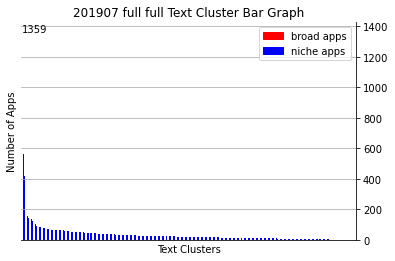

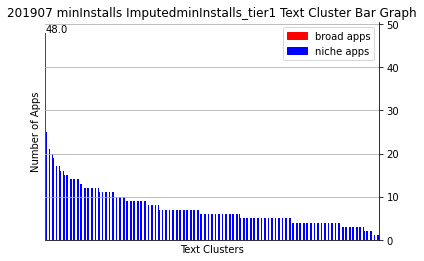

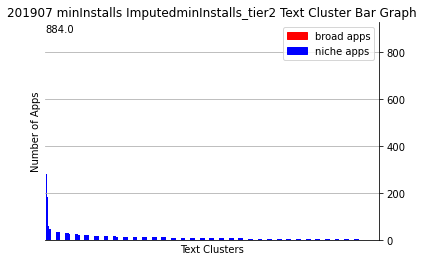

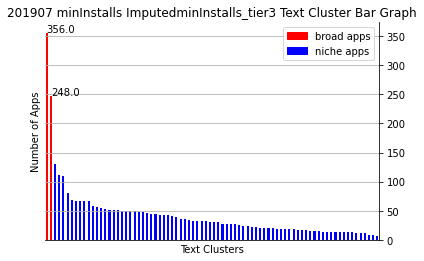

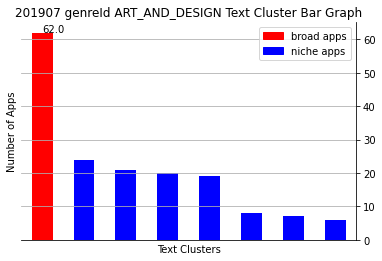

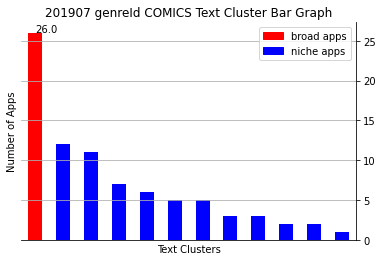

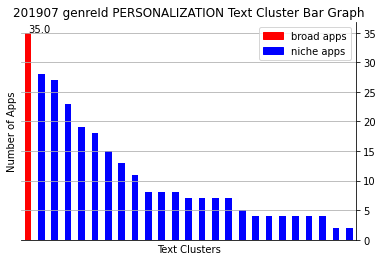

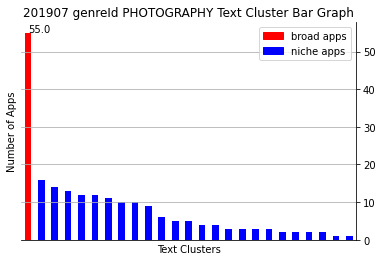

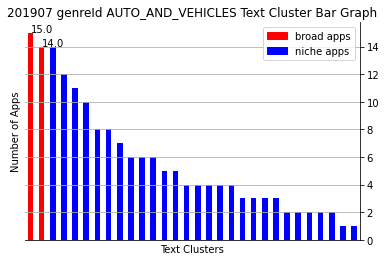

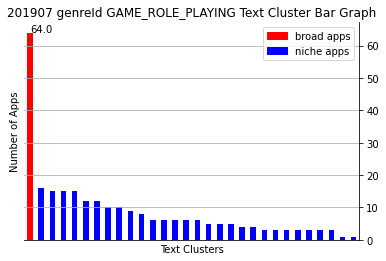

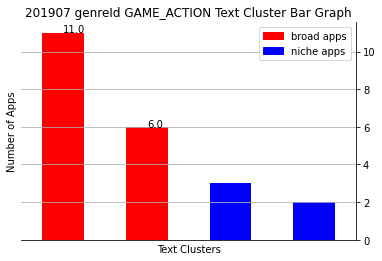

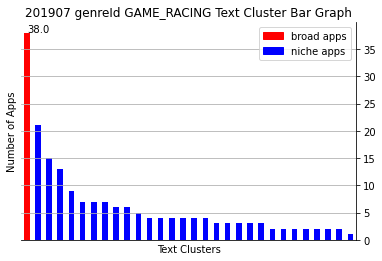

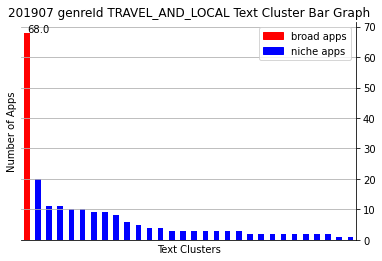

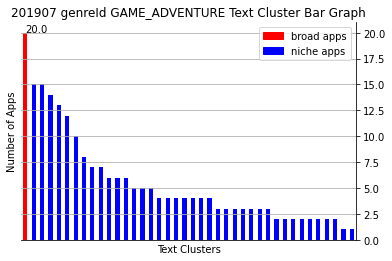

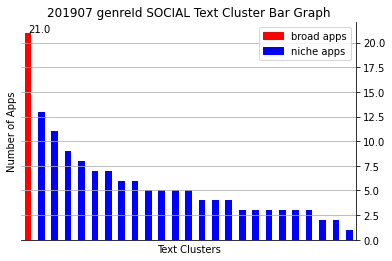

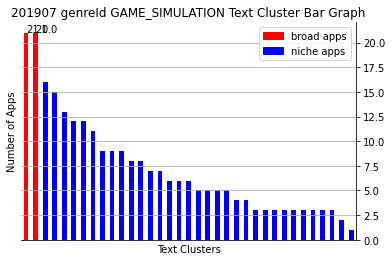

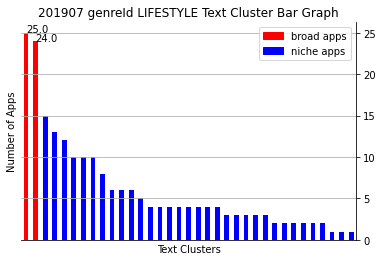

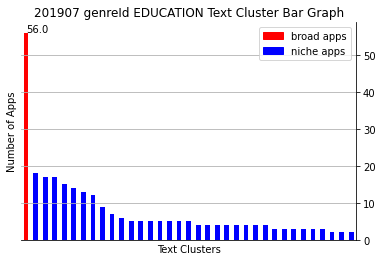

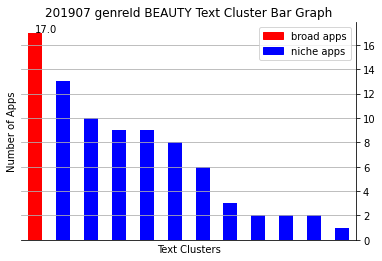

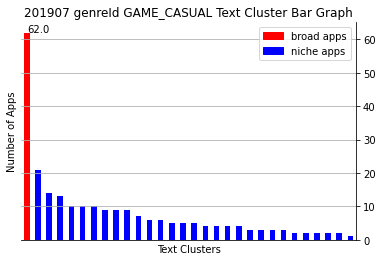

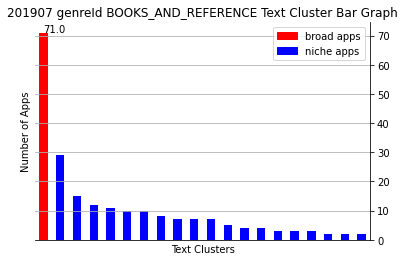

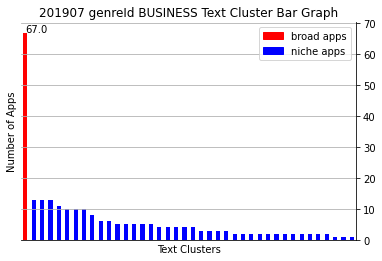

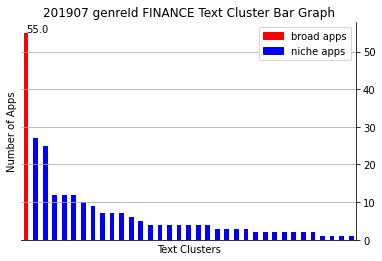

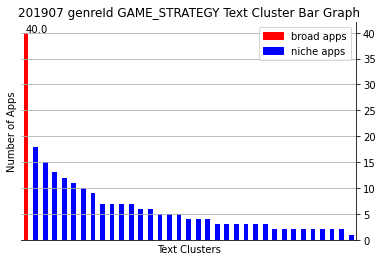

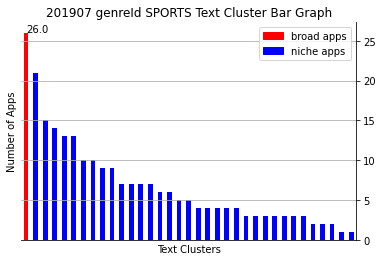

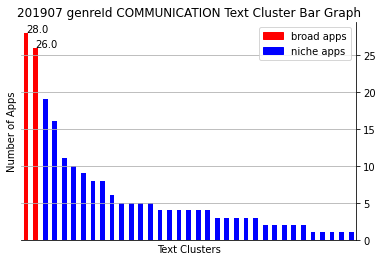

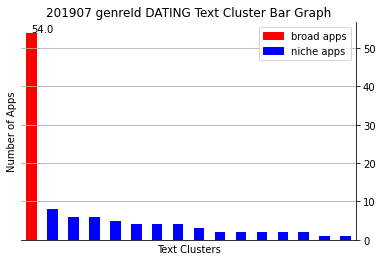

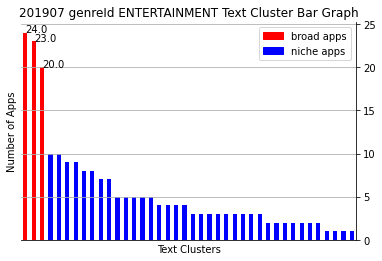

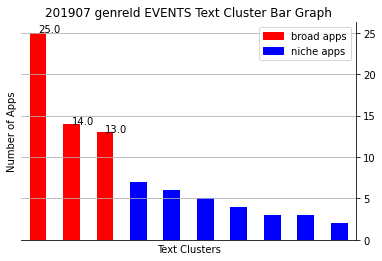

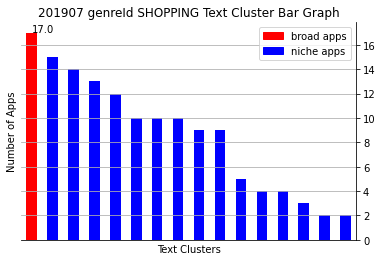

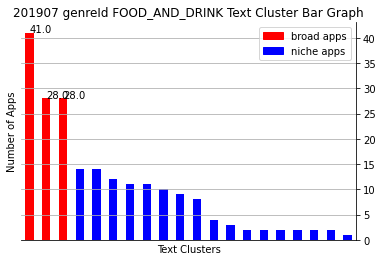

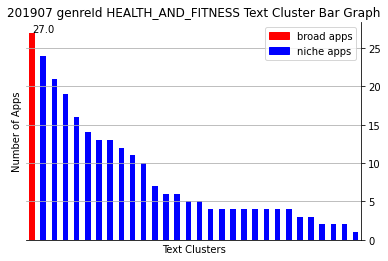

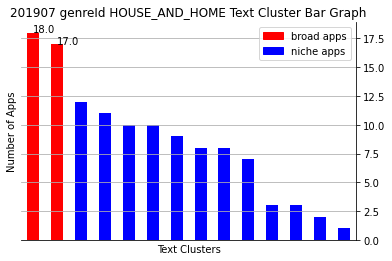

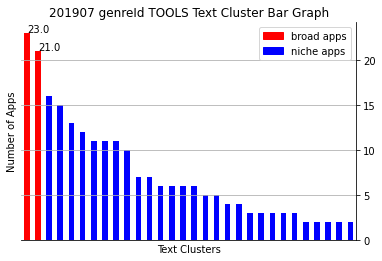

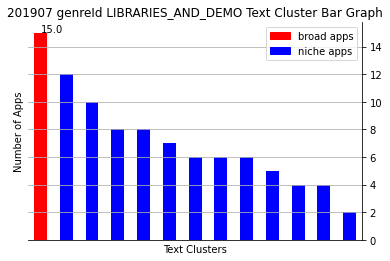

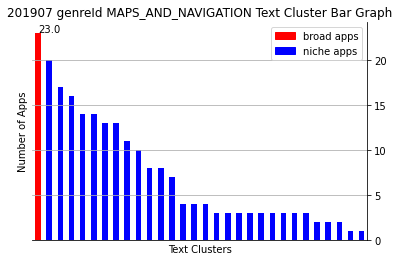

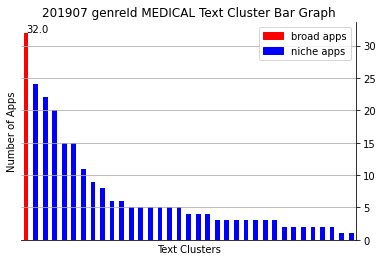

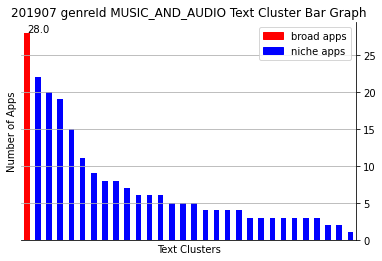

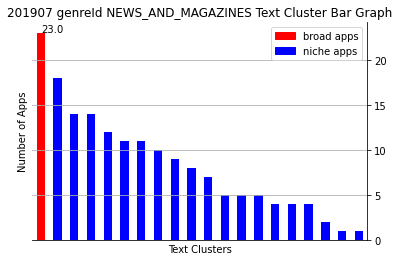

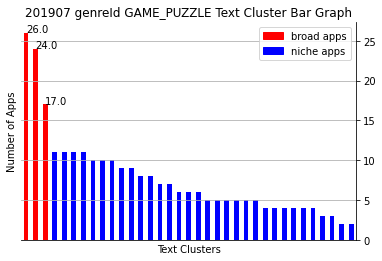

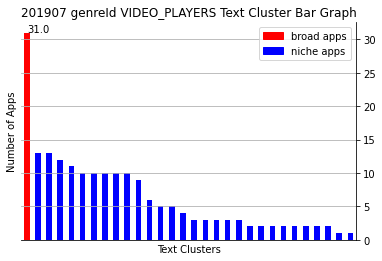

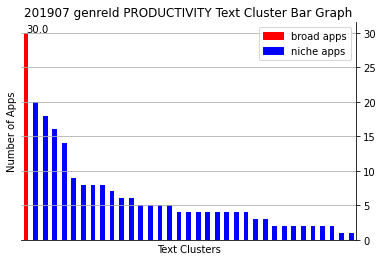

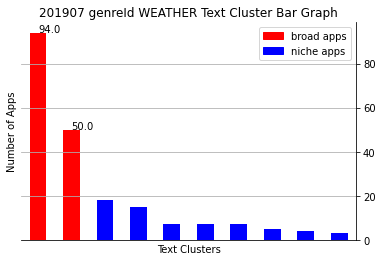

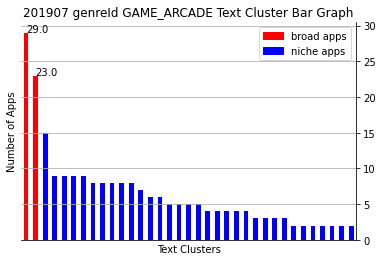

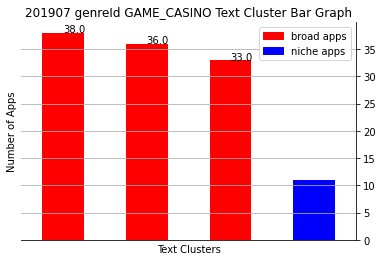

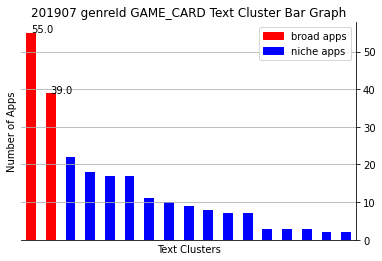

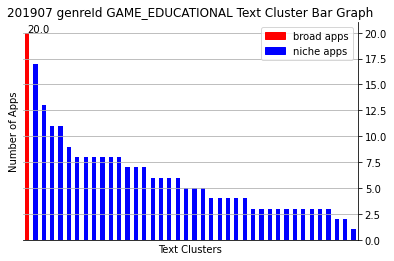

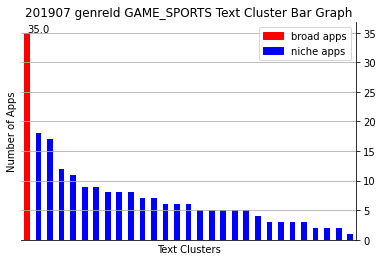

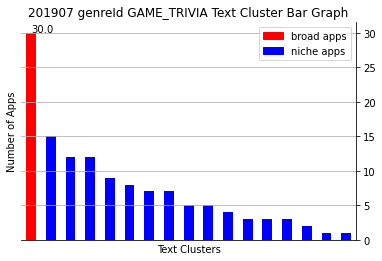

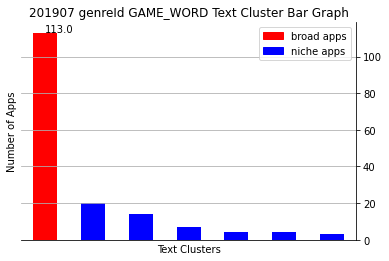

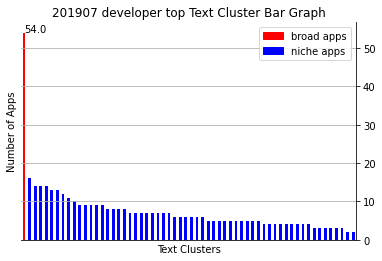

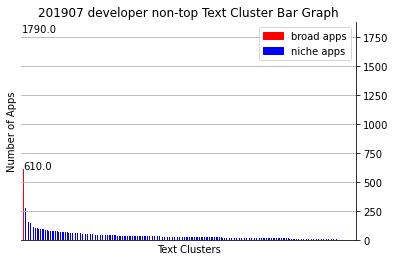

In [15]:
%run -i 'STEP5_ESSAY_1_Long_Table_Prep.py'

d1 = reg_preparation(
         initial_panel=initial_panel,
         all_panels=all_panels,
         tcn = 'description'
    ).open_imputed_deleted_divided_df(
    ).open_predicted_labels_dict(
    ).combine_text_labels_with_df(
    ).create_subsample_name_dict(
    ).check_text_label_contents(
    ).create_subsample_name_dict(
    ).text_cluster_group_count(
    ).text_cluster_bar_chart(
    ).create_NicheDummy(
    ).create_NicheScaleDummies_for_full_sample(
        n=20
    ).create_post_dummy_and_interactions(
        n=20
    ).create_individual_app_dummies(
    ).create_contentRating_dummy(
    ).count_number_of_days_since_released(
    ).create_paid_dummies(
    ).create_generic_true_false_dummies(
        cat_var='offersIAP'
    ).create_generic_true_false_dummies(
        cat_var='containsAds'
    ).create_minInstalls_dummies(
    ).impute_missingSize_as_zero(
    ).create_demean_time_variant_vars(
        time_variant_vars = ['Imputedscore',
                             'minInstallsTop',
                             'minInstallsMiddle',
                             'Imputedreviews']
    ).standardize_continuous_vars(
        con_var='DeMeanedImputedreviews',
        method='zscore'
    ).convert_df_from_wide_to_long(
        time_variant_vars = ['Imputedscore',
                             'minInstallsTop',
                             'minInstallsMiddle',
                             'Imputedreviews',
                             'Imputedprice',
                             'offersIAPTrue',
                             'containsAdsTrue',
                             'paidTrue',
                             'PostDummy',
                             'DeMeanedImputedscore',
                             'DeMeanedminInstallsTop',
                             'DeMeanedminInstallsMiddle',
                             'ZScoreDeMeanedImputedreviews'],
        time_invariant_vars = ['contentRatingAdult',
                               'size',
                               'DaysSinceReleased'],
        n=20
    )

# Test Block for Graphing Niche Scale Against Key Variables

In [5]:
%run -i 'STEP5_ESSAY_1_Long_Table_Prep.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104',
              '202105']

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


full full  BEFORE dropping nan in niche indicators :  (9318, 6)
full full  AFTER dropping nan in niche indicators :  (9318, 6)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


minInstalls ImputedminInstalls_tier1  BEFORE dropping nan in niche indicators :  (1798, 7)
minInstalls ImputedminInstalls_tier1  AFTER dropping nan in niche indicators :  (1782, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


minInstalls ImputedminInstalls_tier2  BEFORE dropping nan in niche indicators :  (4178, 7)
minInstalls ImputedminInstalls_tier2  AFTER dropping nan in niche indicators :  (4169, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


minInstalls ImputedminInstalls_tier3  BEFORE dropping nan in niche indicators :  (3342, 7)
minInstalls ImputedminInstalls_tier3  AFTER dropping nan in niche indicators :  (3342, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId ART_AND_DESIGN  BEFORE dropping nan in niche indicators :  (168, 7)
genreId ART_AND_DESIGN  AFTER dropping nan in niche indicators :  (167, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId COMICS  BEFORE dropping nan in niche indicators :  (82, 7)
genreId COMICS  AFTER dropping nan in niche indicators :  (82, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId PERSONALIZATION  BEFORE dropping nan in niche indicators :  (271, 7)
genreId PERSONALIZATION  AFTER dropping nan in niche indicators :  (271, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId PHOTOGRAPHY  BEFORE dropping nan in niche indicators :  (204, 7)
genreId PHOTOGRAPHY  AFTER dropping nan in niche indicators :  (204, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId AUTO_AND_VEHICLES  BEFORE dropping nan in niche indicators :  (171, 7)
genreId AUTO_AND_VEHICLES  AFTER dropping nan in niche indicators :  (171, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_ROLE_PLAYING  BEFORE dropping nan in niche indicators :  (259, 7)
genreId GAME_ROLE_PLAYING  AFTER dropping nan in niche indicators :  (259, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_ACTION  BEFORE dropping nan in niche indicators :  (23, 7)
genreId GAME_ACTION  AFTER dropping nan in niche indicators :  (22, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_RACING  BEFORE dropping nan in niche indicators :  (183, 7)
genreId GAME_RACING  AFTER dropping nan in niche indicators :  (183, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId TRAVEL_AND_LOCAL  BEFORE dropping nan in niche indicators :  (213, 7)
genreId TRAVEL_AND_LOCAL  AFTER dropping nan in niche indicators :  (212, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_ADVENTURE  BEFORE dropping nan in niche indicators :  (220, 7)
genreId GAME_ADVENTURE  AFTER dropping nan in niche indicators :  (219, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId SOCIAL  BEFORE dropping nan in niche indicators :  (143, 7)
genreId SOCIAL  AFTER dropping nan in niche indicators :  (142, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_SIMULATION  BEFORE dropping nan in niche indicators :  (252, 7)
genreId GAME_SIMULATION  AFTER dropping nan in niche indicators :  (251, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId LIFESTYLE  BEFORE dropping nan in niche indicators :  (209, 7)
genreId LIFESTYLE  AFTER dropping nan in niche indicators :  (208, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId EDUCATION  BEFORE dropping nan in niche indicators :  (275, 7)
genreId EDUCATION  AFTER dropping nan in niche indicators :  (275, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId BEAUTY  BEFORE dropping nan in niche indicators :  (81, 7)
genreId BEAUTY  AFTER dropping nan in niche indicators :  (81, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_CASUAL  BEFORE dropping nan in niche indicators :  (237, 7)
genreId GAME_CASUAL  AFTER dropping nan in niche indicators :  (237, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId BOOKS_AND_REFERENCE  BEFORE dropping nan in niche indicators :  (214, 7)
genreId BOOKS_AND_REFERENCE  AFTER dropping nan in niche indicators :  (214, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:402: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8.5))
/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId BUSINESS  BEFORE dropping nan in niche indicators :  (250, 7)
genreId BUSINESS  AFTER dropping nan in niche indicators :  (250, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId FINANCE  BEFORE dropping nan in niche indicators :  (250, 7)
genreId FINANCE  AFTER dropping nan in niche indicators :  (250, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_STRATEGY  BEFORE dropping nan in niche indicators :  (228, 7)
genreId GAME_STRATEGY  AFTER dropping nan in niche indicators :  (228, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId SPORTS  BEFORE dropping nan in niche indicators :  (237, 7)
genreId SPORTS  AFTER dropping nan in niche indicators :  (237, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId COMMUNICATION  BEFORE dropping nan in niche indicators :  (211, 7)
genreId COMMUNICATION  AFTER dropping nan in niche indicators :  (210, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId DATING  BEFORE dropping nan in niche indicators :  (105, 7)
genreId DATING  AFTER dropping nan in niche indicators :  (105, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId ENTERTAINMENT  BEFORE dropping nan in niche indicators :  (221, 7)
genreId ENTERTAINMENT  AFTER dropping nan in niche indicators :  (219, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_BOARD  BEFORE dropping nan in niche indicators :  (207, 7)
genreId GAME_BOARD  AFTER dropping nan in niche indicators :  (207, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId EVENTS  BEFORE dropping nan in niche indicators :  (82, 7)
genreId EVENTS  AFTER dropping nan in niche indicators :  (82, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId SHOPPING  BEFORE dropping nan in niche indicators :  (138, 7)
genreId SHOPPING  AFTER dropping nan in niche indicators :  (138, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId FOOD_AND_DRINK  BEFORE dropping nan in niche indicators :  (206, 7)
genreId FOOD_AND_DRINK  AFTER dropping nan in niche indicators :  (206, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId HEALTH_AND_FITNESS  BEFORE dropping nan in niche indicators :  (250, 7)
genreId HEALTH_AND_FITNESS  AFTER dropping nan in niche indicators :  (250, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId HOUSE_AND_HOME  BEFORE dropping nan in niche indicators :  (116, 7)
genreId HOUSE_AND_HOME  AFTER dropping nan in niche indicators :  (116, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId TOOLS  BEFORE dropping nan in niche indicators :  (220, 7)
genreId TOOLS  AFTER dropping nan in niche indicators :  (220, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId LIBRARIES_AND_DEMO  BEFORE dropping nan in niche indicators :  (92, 7)
genreId LIBRARIES_AND_DEMO  AFTER dropping nan in niche indicators :  (92, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId MAPS_AND_NAVIGATION  BEFORE dropping nan in niche indicators :  (222, 7)
genreId MAPS_AND_NAVIGATION  AFTER dropping nan in niche indicators :  (221, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId MEDICAL  BEFORE dropping nan in niche indicators :  (245, 7)
genreId MEDICAL  AFTER dropping nan in niche indicators :  (245, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId MUSIC_AND_AUDIO  BEFORE dropping nan in niche indicators :  (221, 7)
genreId MUSIC_AND_AUDIO  AFTER dropping nan in niche indicators :  (221, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId NEWS_AND_MAGAZINES  BEFORE dropping nan in niche indicators :  (163, 7)
genreId NEWS_AND_MAGAZINES  AFTER dropping nan in niche indicators :  (163, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId PARENTING  BEFORE dropping nan in niche indicators :  (129, 7)
genreId PARENTING  AFTER dropping nan in niche indicators :  (129, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_PUZZLE  BEFORE dropping nan in niche indicators :  (271, 7)
genreId GAME_PUZZLE  AFTER dropping nan in niche indicators :  (271, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId VIDEO_PLAYERS  BEFORE dropping nan in niche indicators :  (188, 7)
genreId VIDEO_PLAYERS  AFTER dropping nan in niche indicators :  (188, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId PRODUCTIVITY  BEFORE dropping nan in niche indicators :  (222, 7)
genreId PRODUCTIVITY  AFTER dropping nan in niche indicators :  (221, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId WEATHER  BEFORE dropping nan in niche indicators :  (205, 7)
genreId WEATHER  AFTER dropping nan in niche indicators :  (205, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_ARCADE  BEFORE dropping nan in niche indicators :  (228, 7)
genreId GAME_ARCADE  AFTER dropping nan in niche indicators :  (228, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_CASINO  BEFORE dropping nan in niche indicators :  (117, 7)
genreId GAME_CASINO  AFTER dropping nan in niche indicators :  (117, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_CARD  BEFORE dropping nan in niche indicators :  (230, 7)
genreId GAME_CARD  AFTER dropping nan in niche indicators :  (230, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_EDUCATIONAL  BEFORE dropping nan in niche indicators :  (243, 7)
genreId GAME_EDUCATIONAL  AFTER dropping nan in niche indicators :  (242, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_MUSIC  BEFORE dropping nan in niche indicators :  (117, 7)
genreId GAME_MUSIC  AFTER dropping nan in niche indicators :  (117, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_SPORTS  BEFORE dropping nan in niche indicators :  (209, 7)
genreId GAME_SPORTS  AFTER dropping nan in niche indicators :  (209, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_TRIVIA  BEFORE dropping nan in niche indicators :  (126, 7)
genreId GAME_TRIVIA  AFTER dropping nan in niche indicators :  (126, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


genreId GAME_WORD  BEFORE dropping nan in niche indicators :  (164, 7)
genreId GAME_WORD  AFTER dropping nan in niche indicators :  (164, 7)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


developer top  BEFORE dropping nan in niche indicators :  (447, 8)
developer top  AFTER dropping nan in niche indicators :  (447, 8)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


developer non-top  BEFORE dropping nan in niche indicators :  (8871, 8)
developer non-top  AFTER dropping nan in niche indicators :  (8871, 8)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


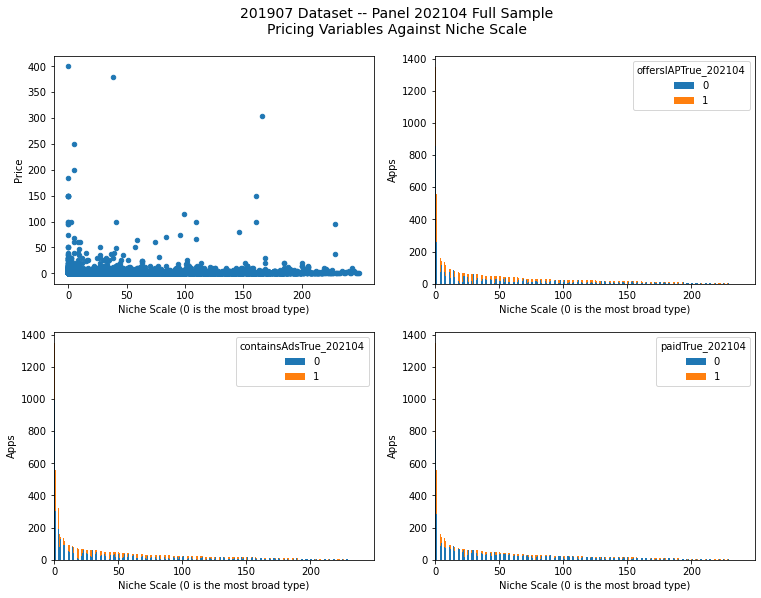

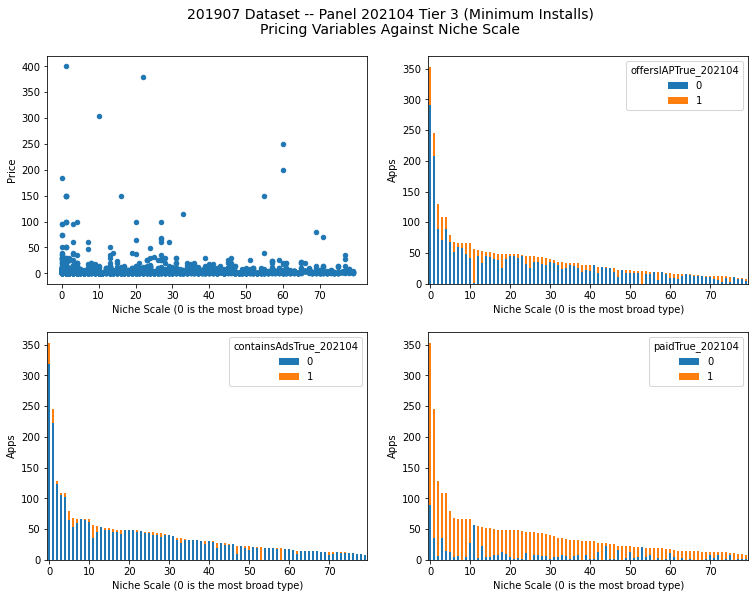

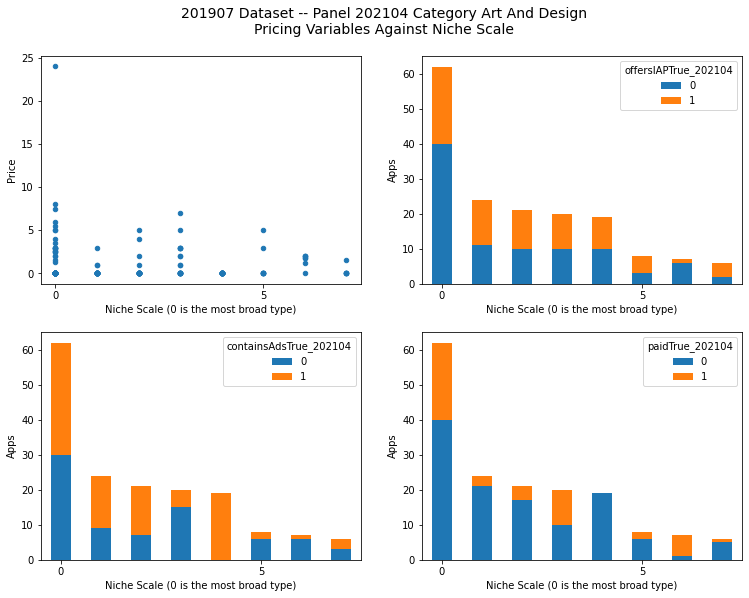

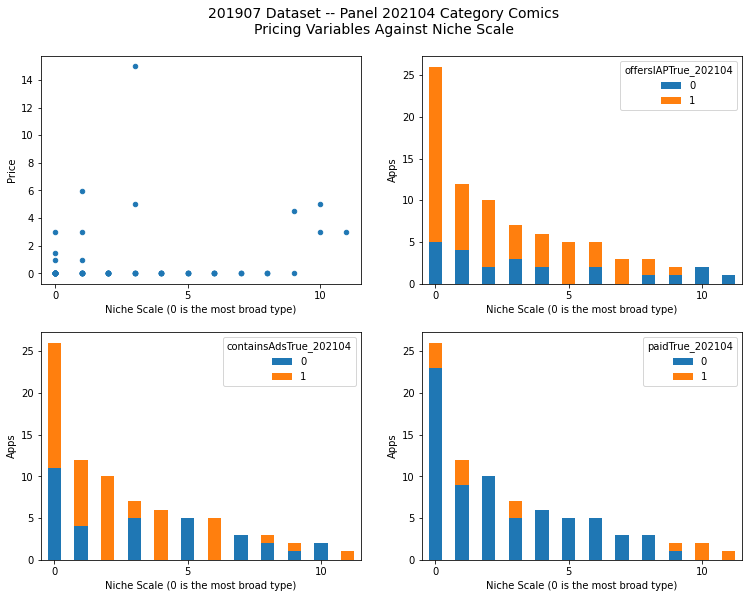

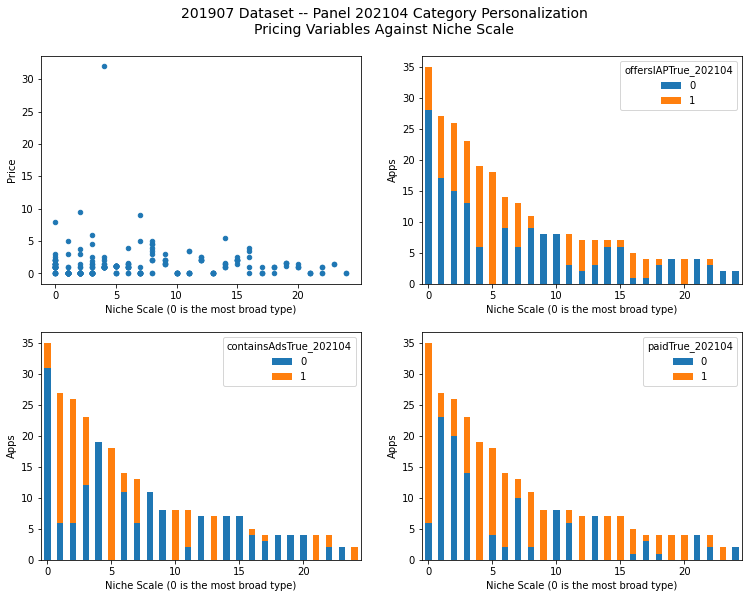

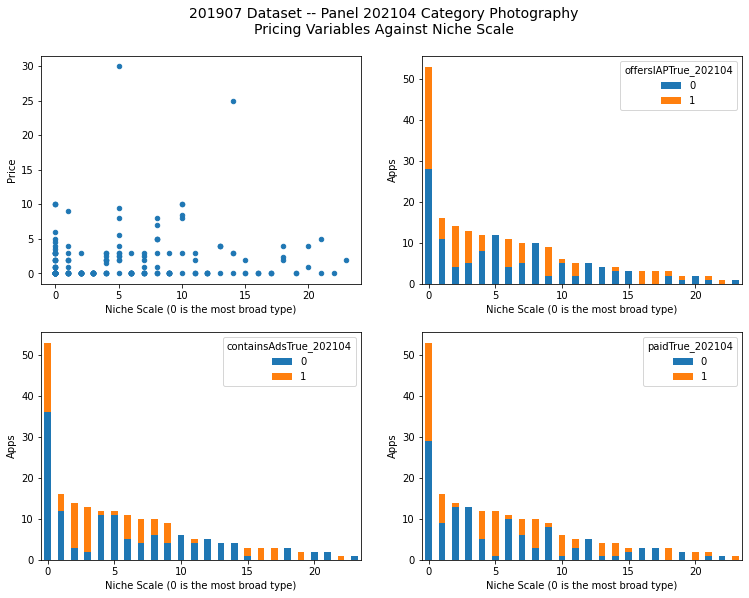

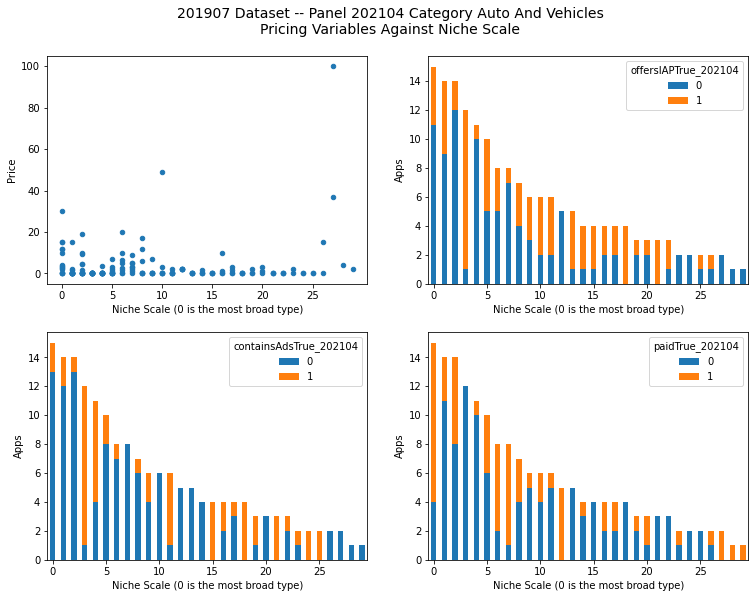

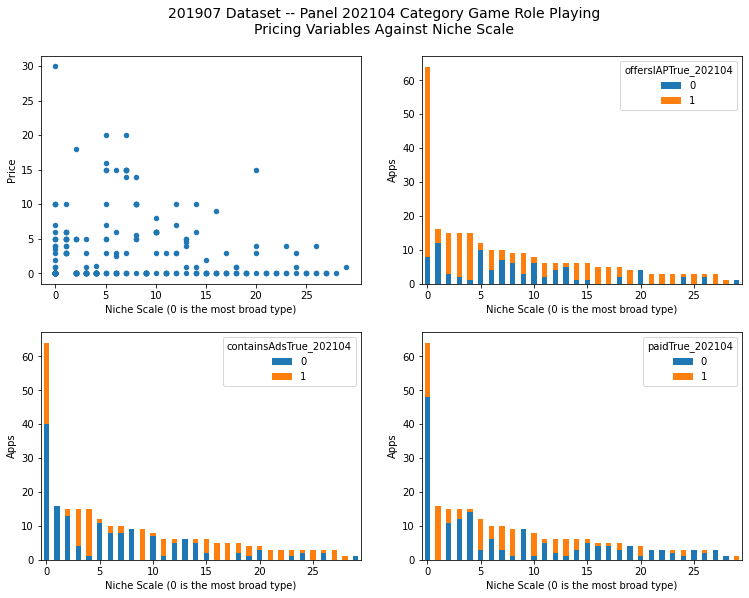

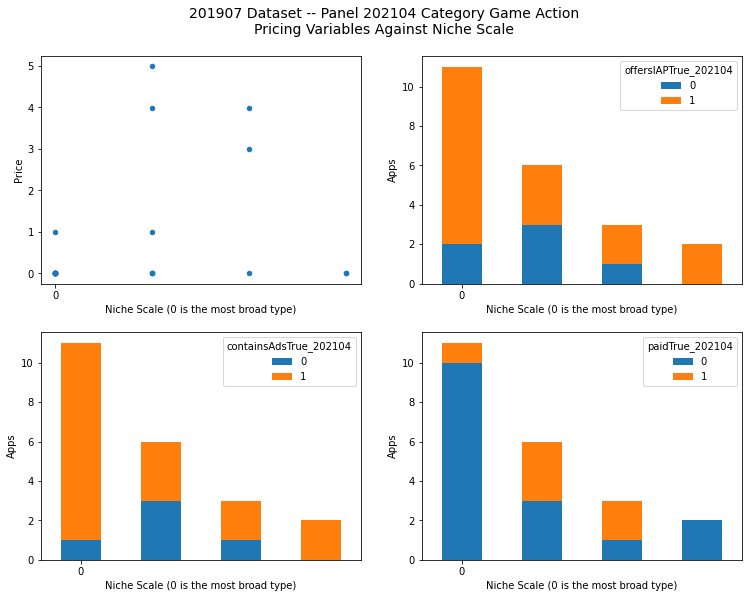

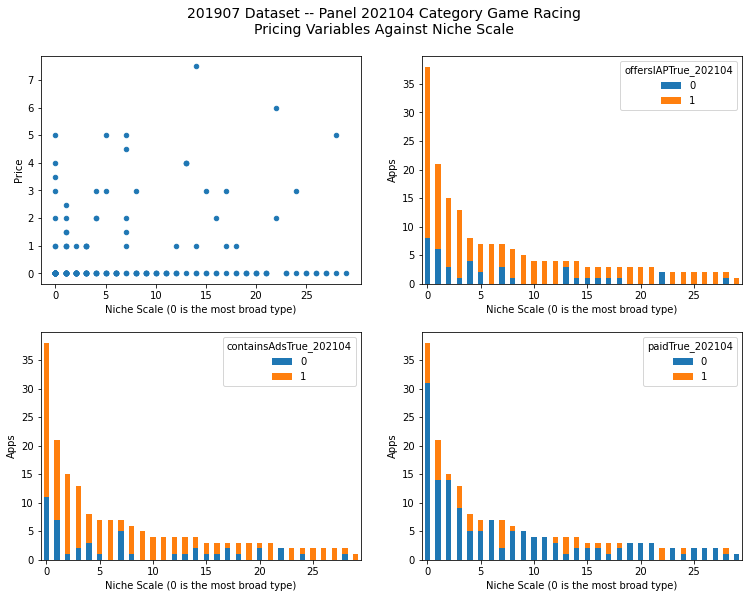

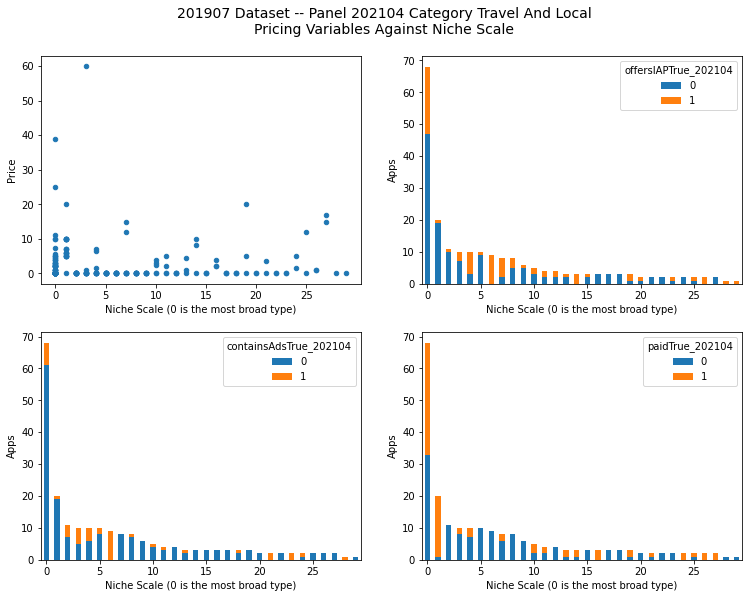

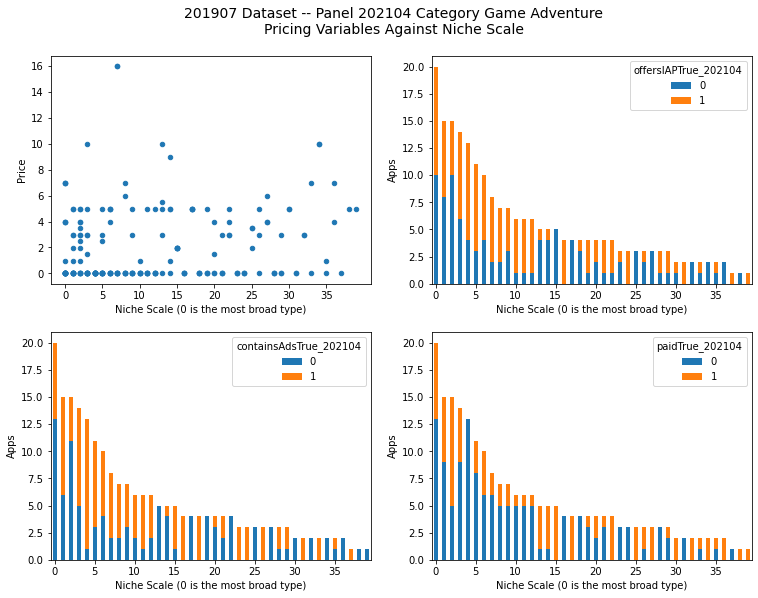

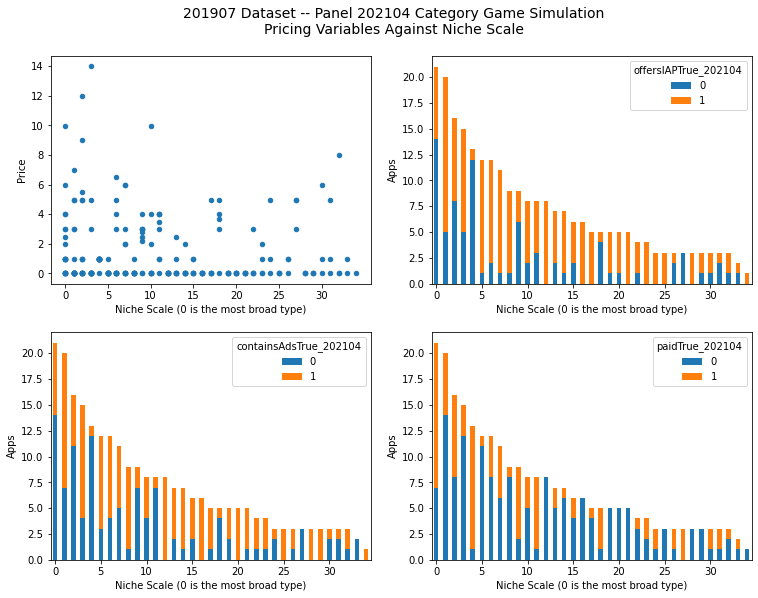

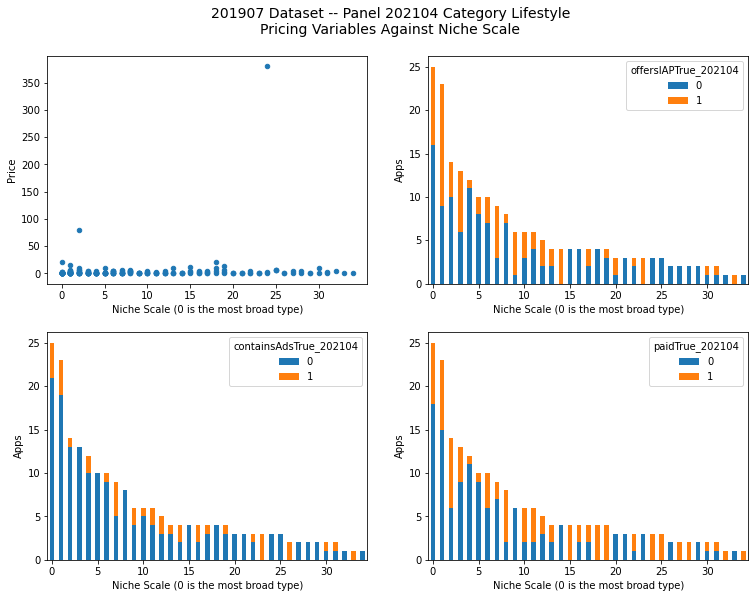

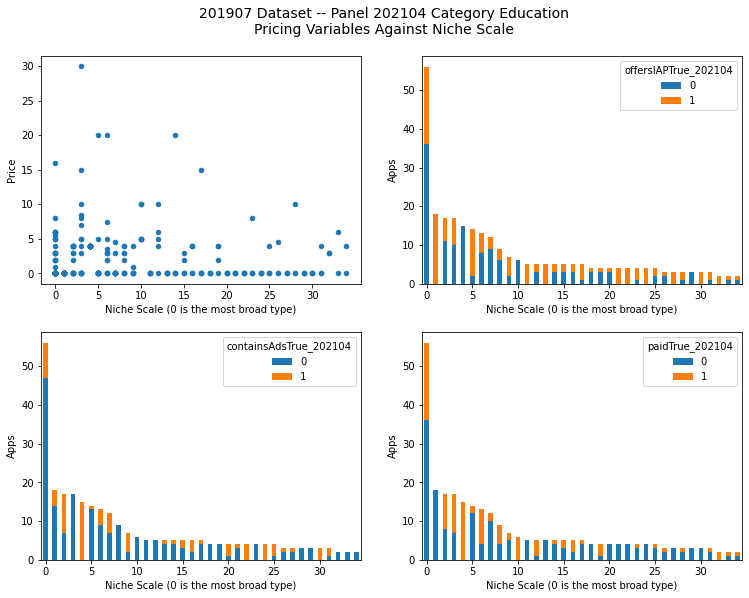

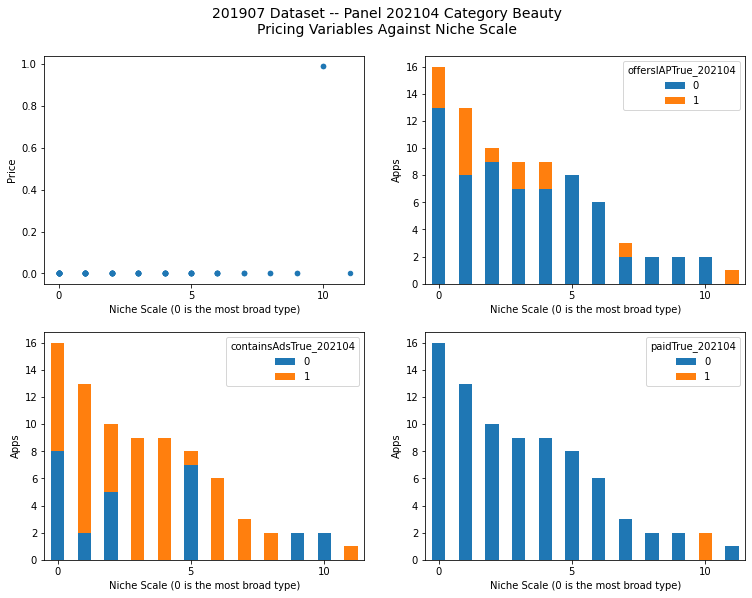

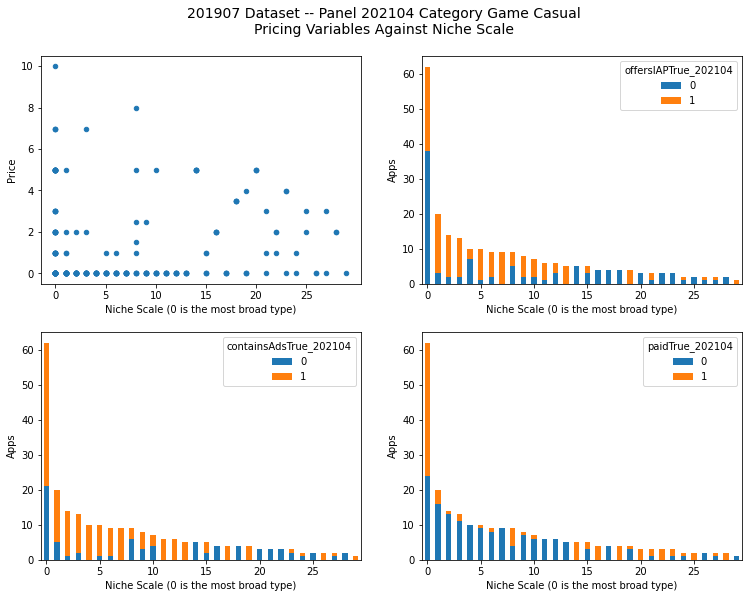

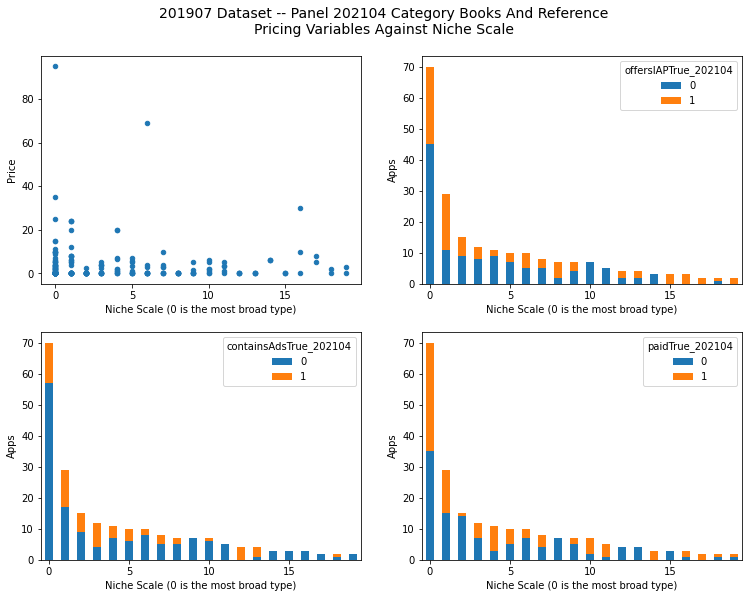

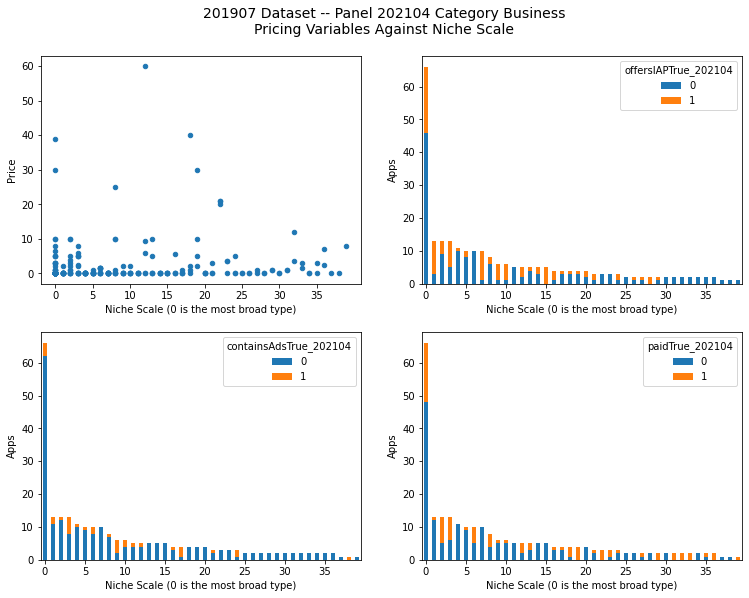

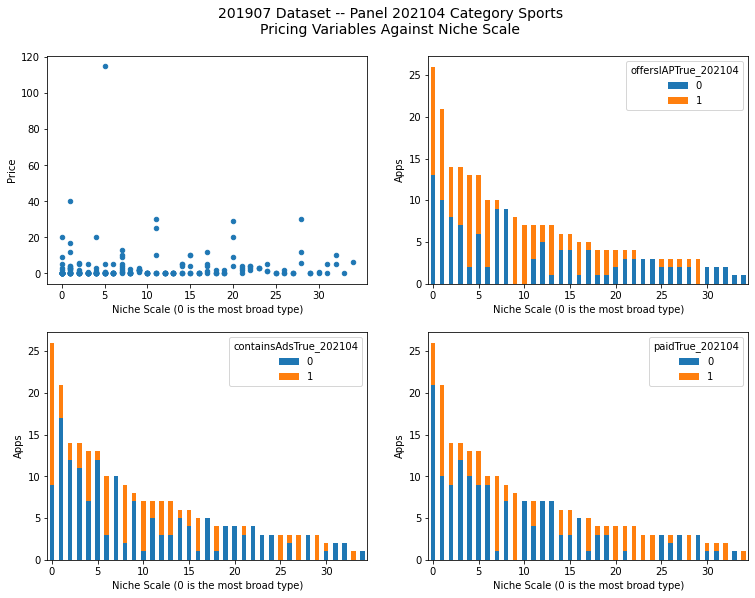

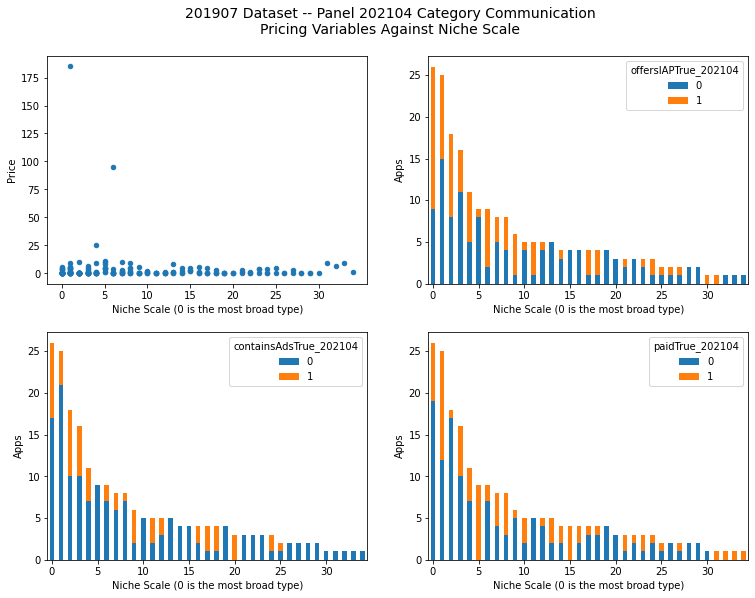

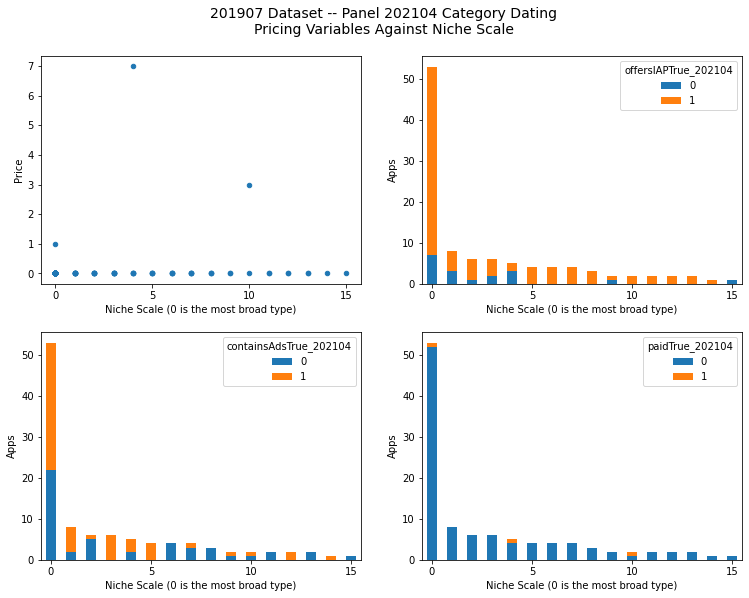

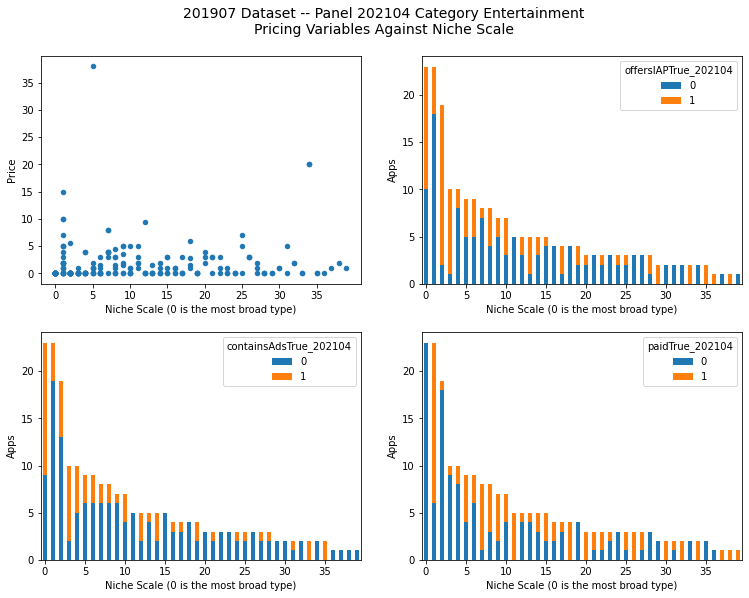

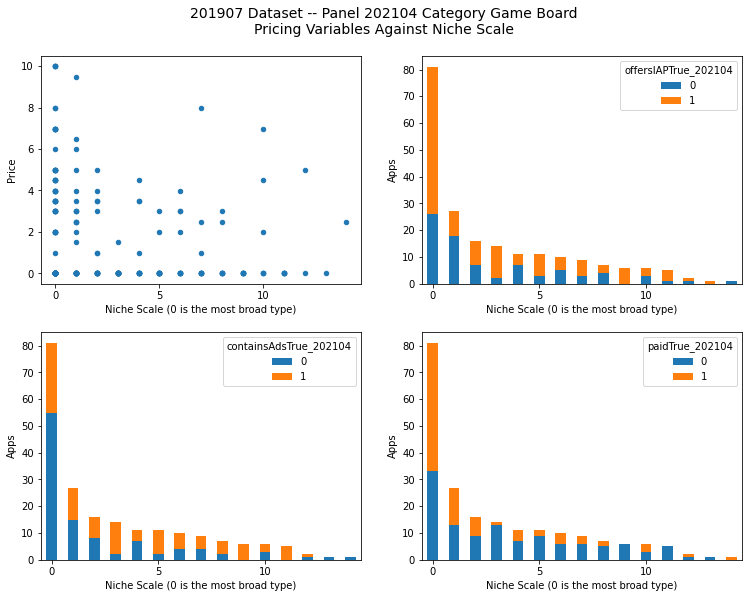

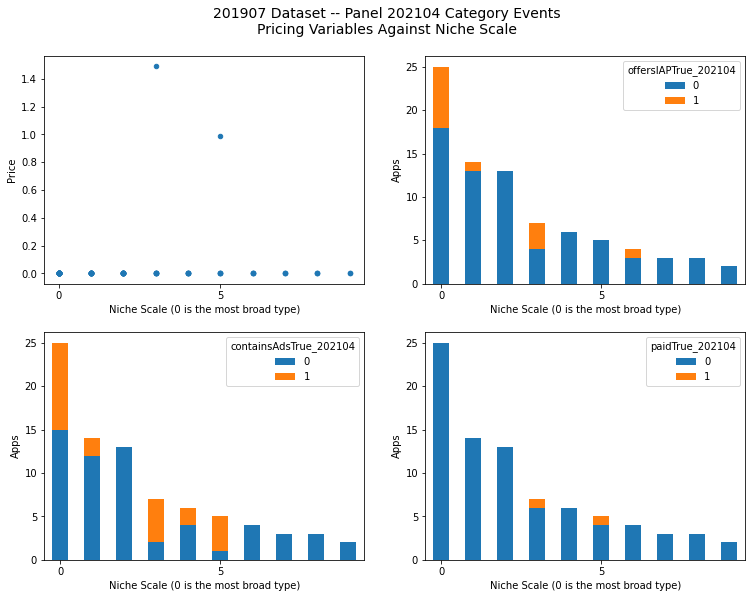

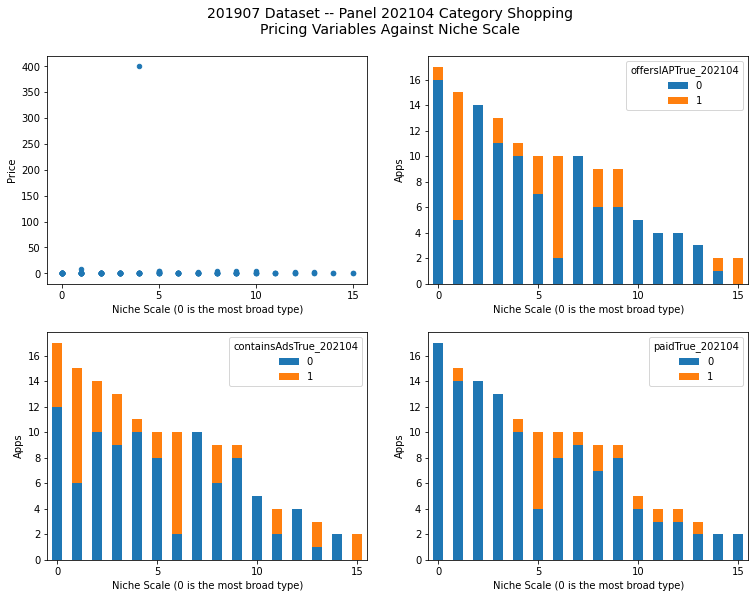

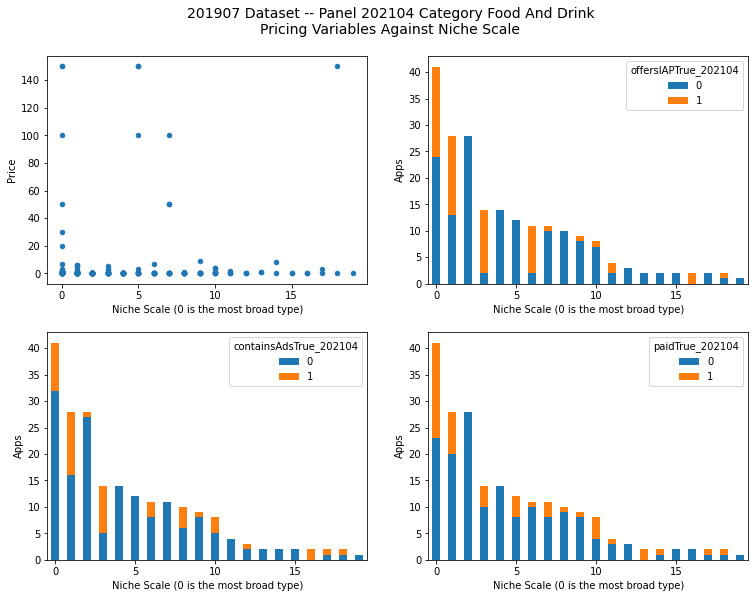

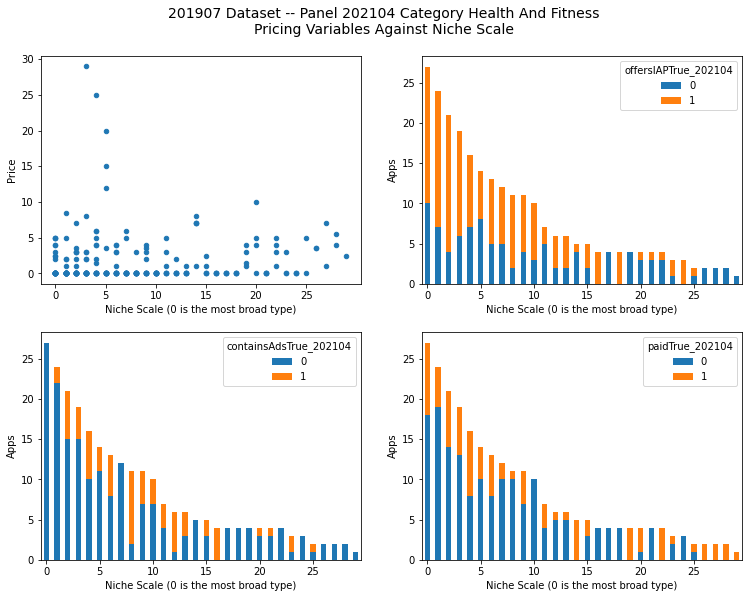

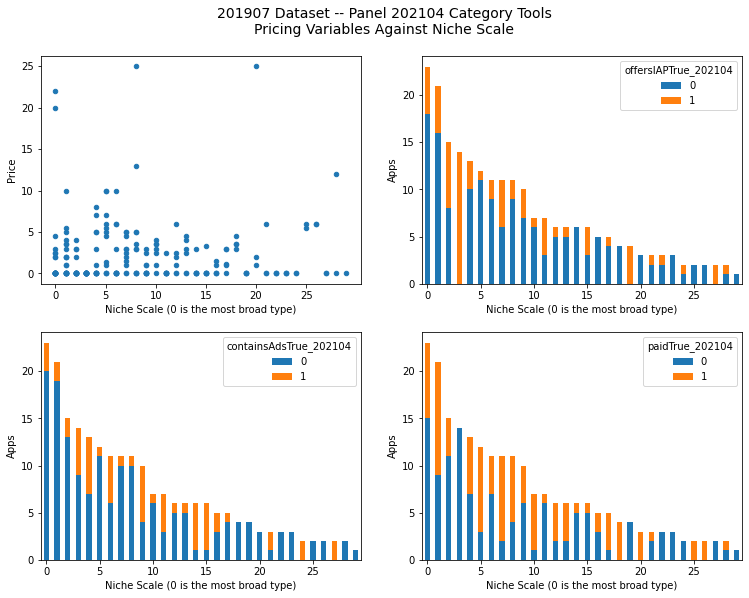

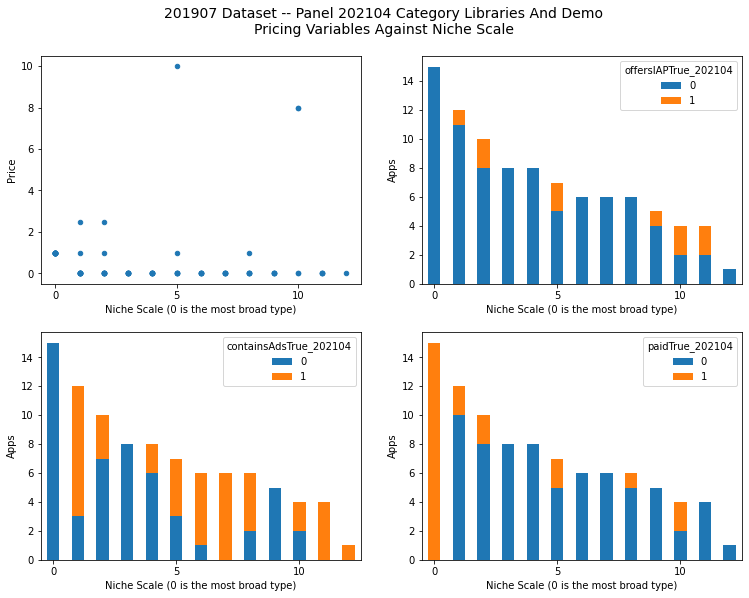

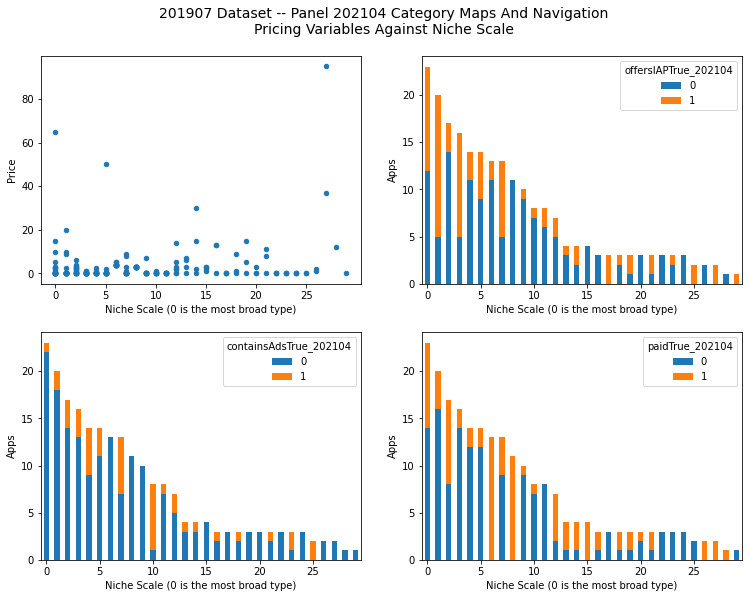

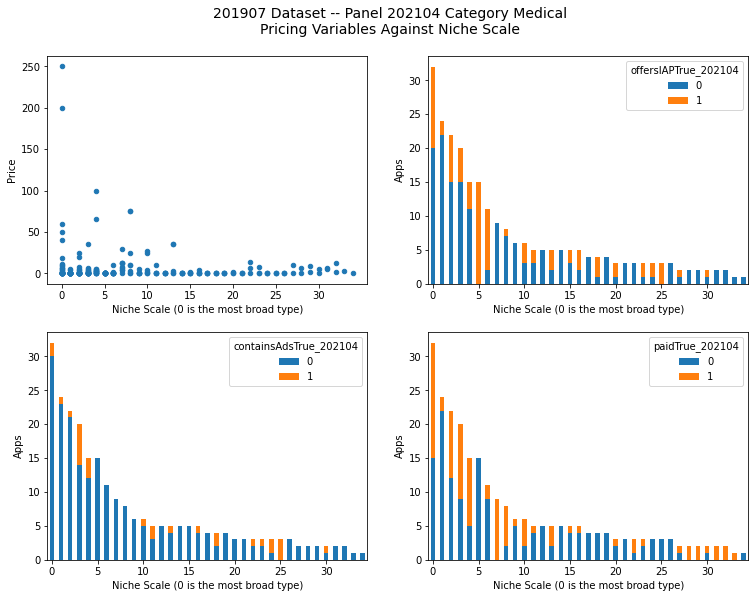

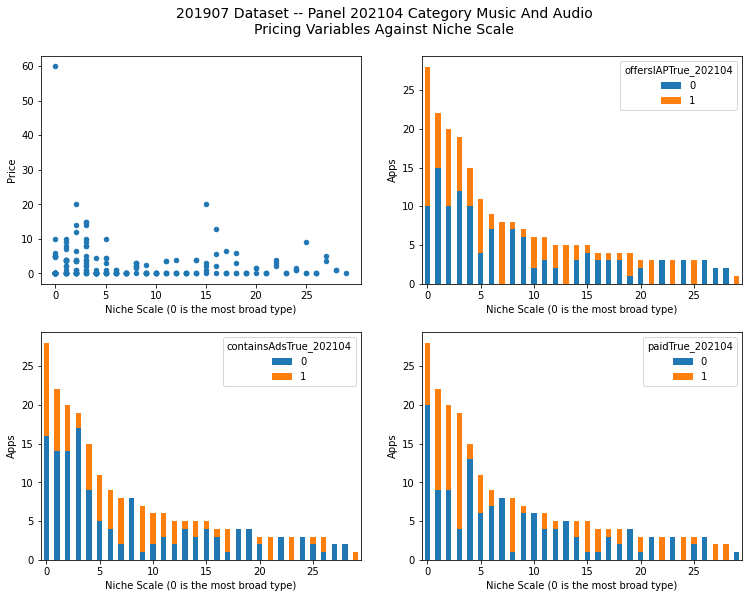

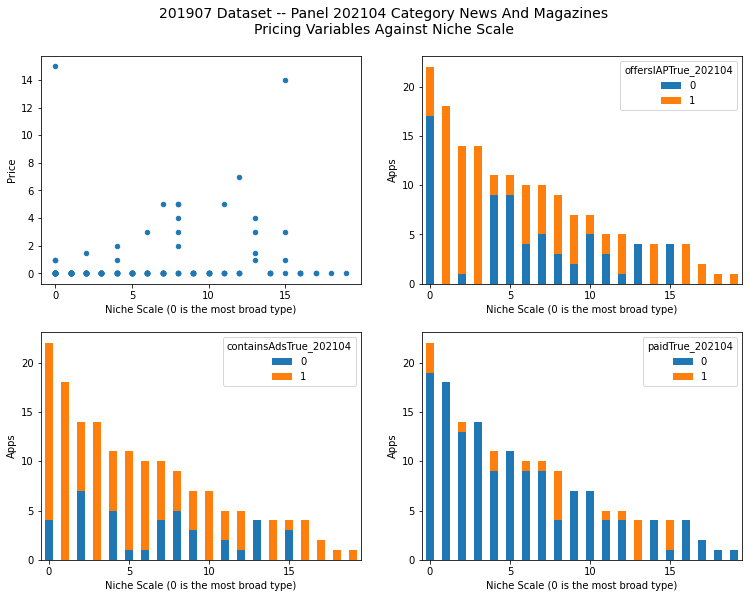

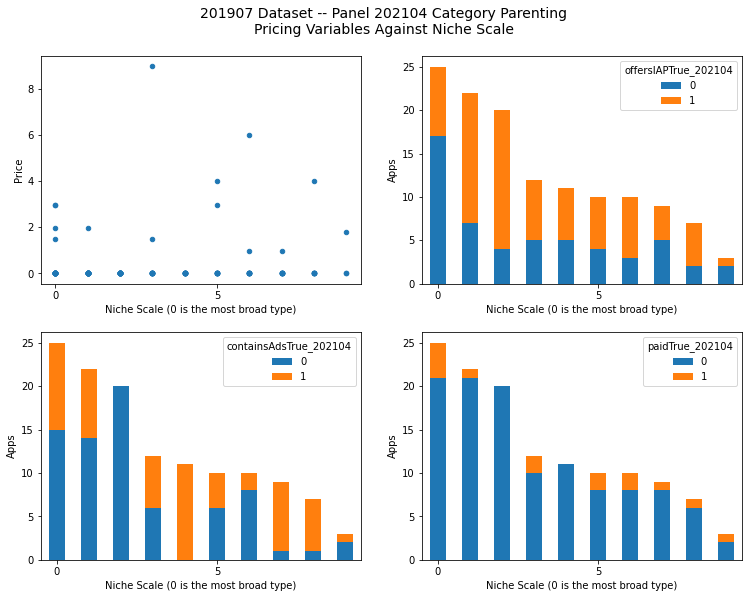

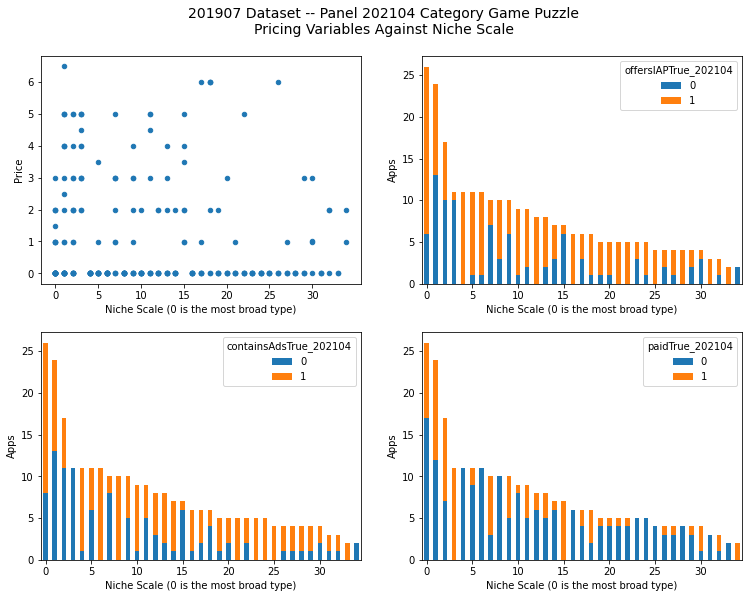

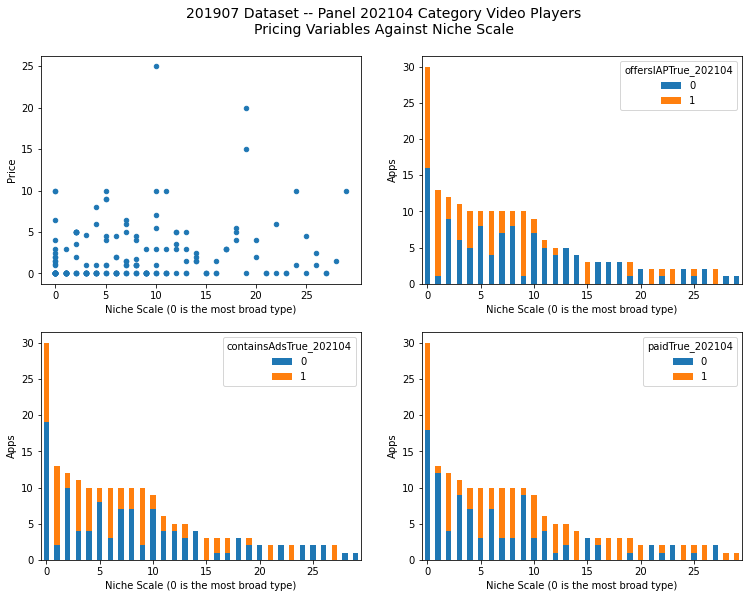

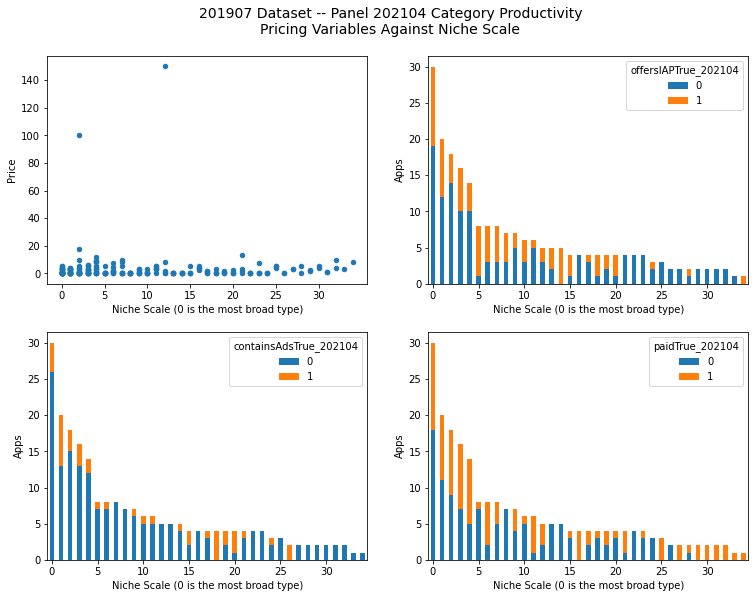

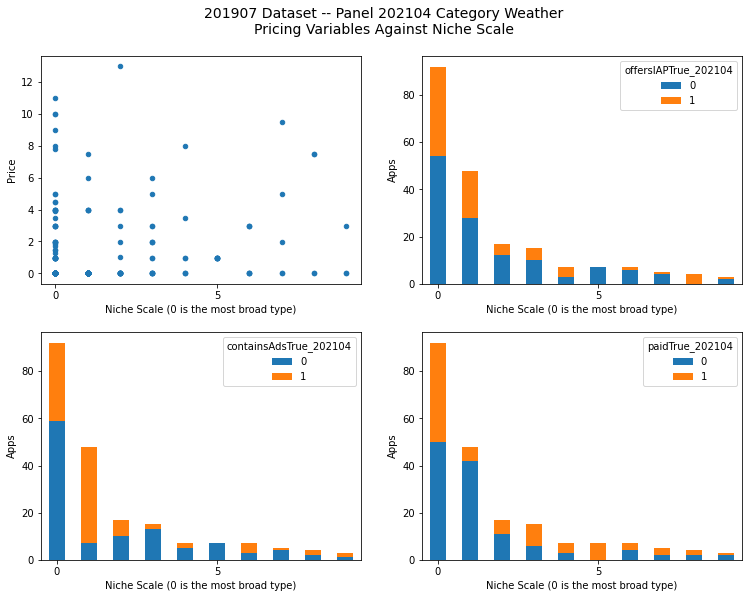

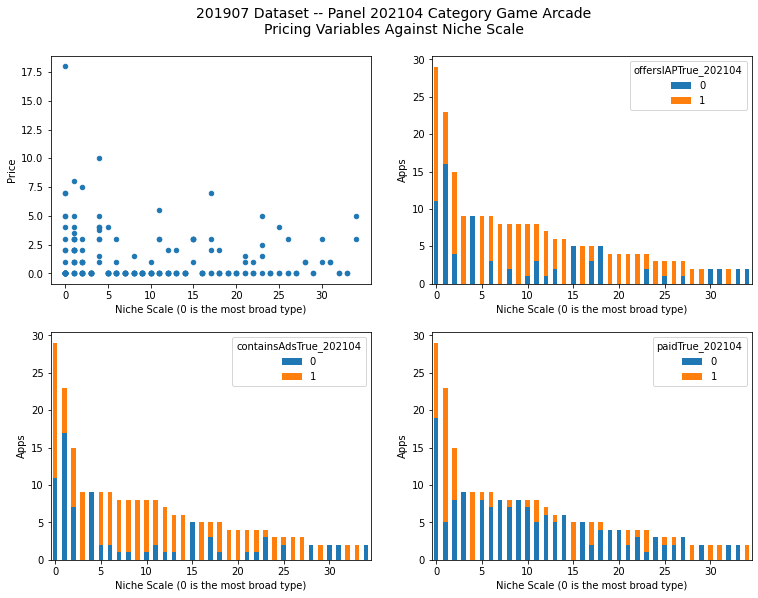

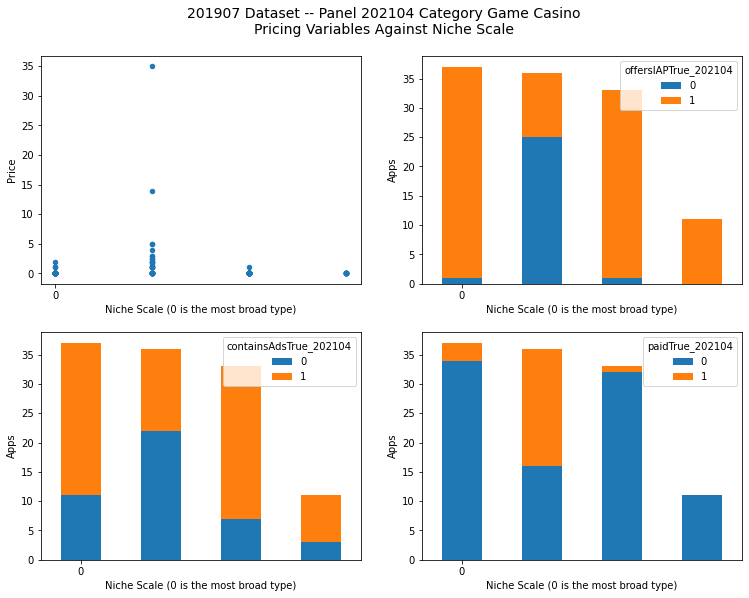

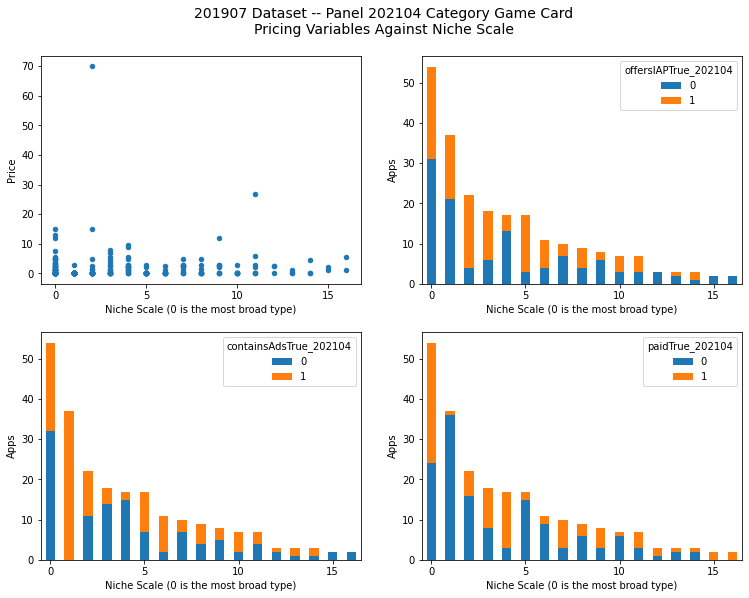

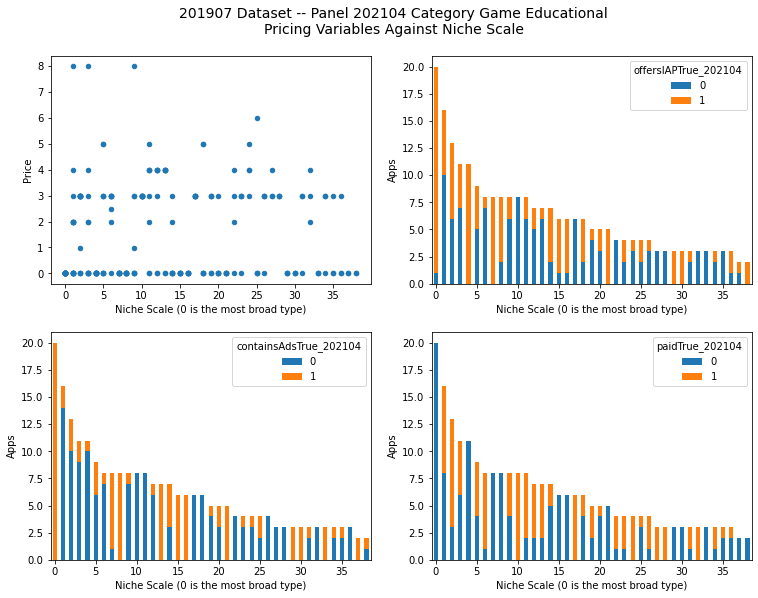

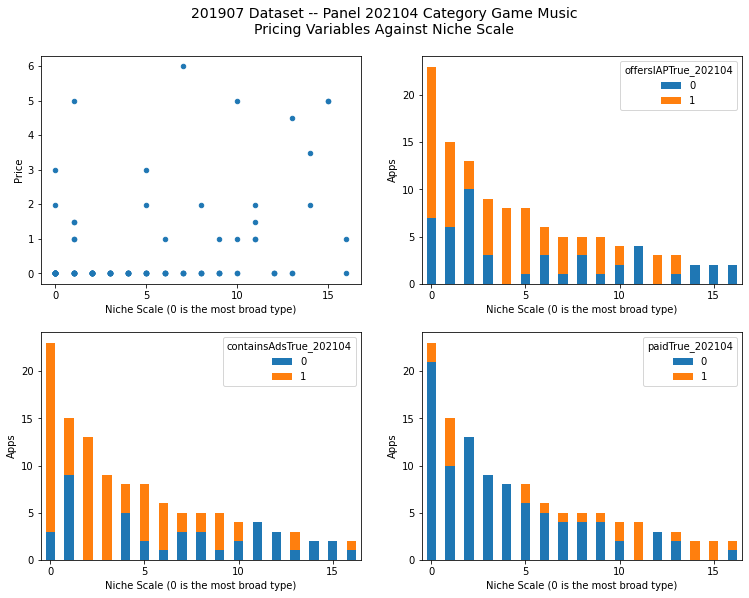

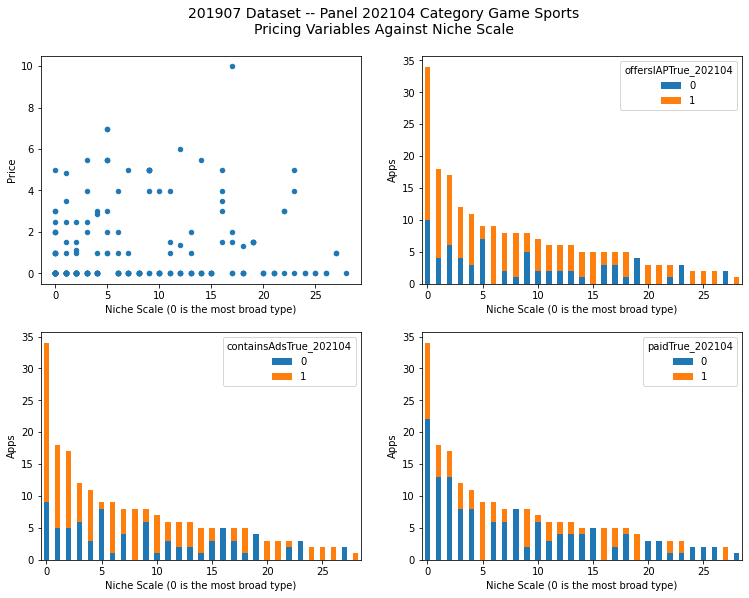

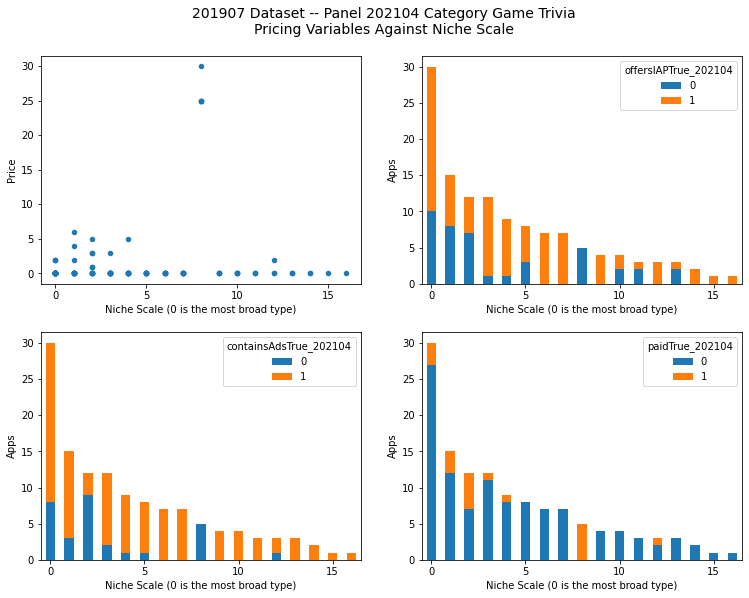

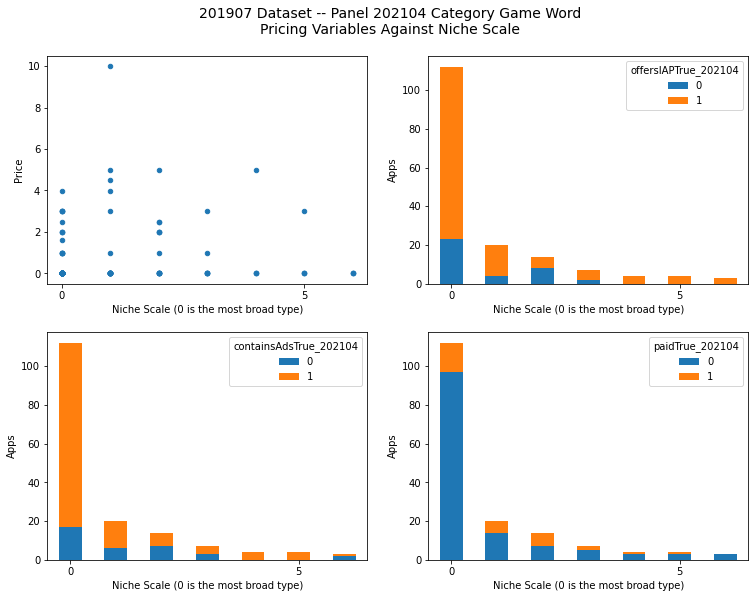

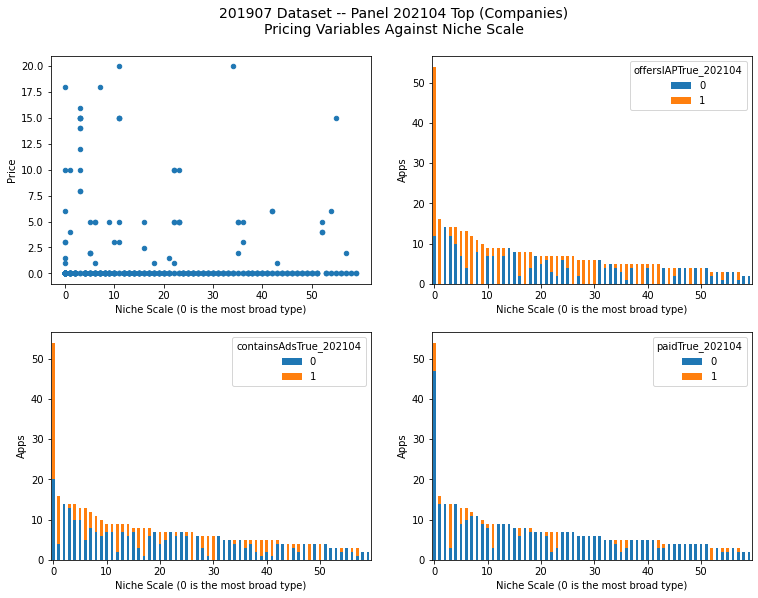

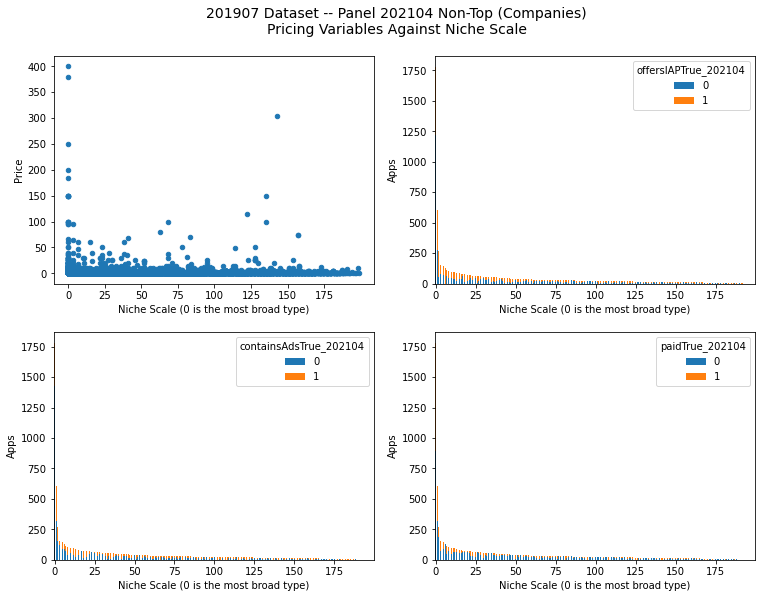

In [20]:
%run -i 'STEP5_ESSAY_1_Long_Table_Prep.py'

d1 = reg_preparation(
         initial_panel=initial_panel,
         all_panels=all_panels,
         tcn = 'description'
    ).open_imputed_deleted_divided_df(
    ).open_predicted_labels_dict(
    ).combine_text_labels_with_df(
    ).create_subsample_name_dict(
    ).create_paid_dummies(
    ).create_generic_true_false_dummies(
        cat_var='offersIAP'
    ).create_generic_true_false_dummies(
        cat_var='containsAds'
    ).niche_scale_scatter_plot_against_key_vars(
        the_panel='202104')

In [21]:
# see why there are nan in niche_kv_dfs
test_df_full = d1.niche_kv_dfs['full']['full'].copy(deep=True)

In [ ]:
test_df = d1.niche_kv_dfs['minInstalls']['ImputedminInstalls_tier1'].copy(deep=True)

In [15]:
name1='minInstalls'
name2='ImputedminInstalls_tier1'
def create_index_indicator_based_on_group_size(name1, name2, df):
    df2 = df.copy(deep=True)
    df3 = df2.groupby([name1 + '_' + name2 + '_kmeans_labels']).size(
    ).sort_values(ascending=False).to_frame().reset_index()
    # niche_indicator: 0 the group with most members (most broad), 1 decreasing members ...
    df3['niche_indicators'] = np.arange(df3.shape[0])
    niche_label_and_indicators = list(zip(df3[name1 + '_' + name2 + \
                                              '_kmeans_labels'],
                                          df3['niche_indicators']))
    df2['niche_indicators'] = None
    for i in niche_label_and_indicators:
        df2.at[df2[name1 + '_' + name2 + '_kmeans_labels'] == i[0],
               'niche_indicators'] = i[1]
    print(name1, name2, ' BEFORE dropping nan in niche indicators : ', df2.shape)
    df2.dropna(subset = ['niche_indicators'], inplace=True)
    print(name1, name2, ' AFTER dropping nan in niche indicators : ', df2.shape)
    return df2
df2 = create_index_indicator_based_on_group_size(name1=name1,
                                                 name2=name2,
                                                 df=test_df)

minInstalls ImputedminInstalls_tier1  BEFORE dropping nan in niche indicators :  (1798, 7)
minInstalls ImputedminInstalls_tier1  AFTER dropping nan in niche indicators :  (1782, 7)


<ipython-input-16-93b1b52c667b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column


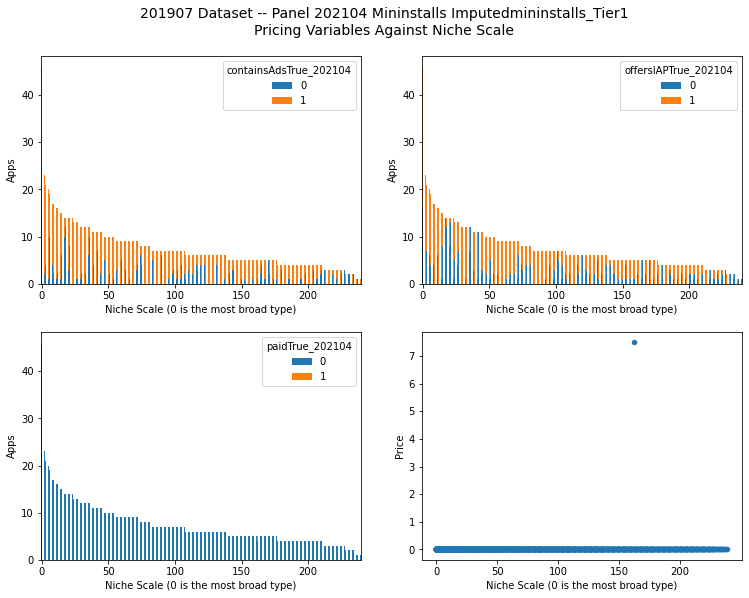

In [16]:
def scatter_graph_niche_indicator_against_a_key_var(
        name1, name2, df, key_vars, the_panel):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8.5))
    fig.tight_layout(pad=3)
    for i in range(len(key_vars)):
        if 'price' in key_vars[i]:
            pass
            ax.flat[i] = df.plot.scatter(x='niche_indicators',
                                    y=key_vars[i], ax=ax.flat[i])
            ax.flat[i].set_ylabel('Price')
            np1 = df['niche_indicators'].to_numpy()
        else:
            df2 = df.copy(deep=True)
            df3 = df2[['niche_indicators', key_vars[i]]]
            df3['Apps'] = 1 # count column
            df4 = df3.groupby(['niche_indicators', key_vars[i]]).sum().unstack()
            df4 = df4.fillna(0) # beacuse nan means actually there is no member in the group
            ax.flat[i] = df4.plot(kind='bar', y='Apps', stacked=True, ax=ax.flat[i])
            ax.flat[i].set_ylabel('Apps')
            np1 = df4.index.to_numpy()
        if name1 == 'full':
            ax.flat[i].set_xticks(np.arange(min(np1), max(np1) + 1, 50.0).astype(int))
        elif name1 == 'developer':
            if name2 == 'top':
                ax.flat[i].set_xticks(np.arange(min(np1), max(np1) + 1, 10.0).astype(int))
            else:
                ax.flat[i].set_xticks(np.arange(min(np1), max(np1) + 1, 25.0).astype(int))
        elif name1 == 'minInstalls':
            if name2 == 'ImputedminInstalls_tier1':
                ax.flat[i].set_xticks(np.arange(min(np1), max(np1) + 1, 50.0).astype(int))
            elif name2 == 'ImputedminInstalls_tier2':
                ax.flat[i].set_xticks(np.arange(min(np1), max(np1) + 1, 50.0).astype(int))
            else:
                ax.flat[i].set_xticks(np.arange(min(np1), max(np1) + 1, 10.0).astype(int))
        else:
            ax.flat[i].set_xticks(np.arange(min(np1), max(np1) + 1, 5.0).astype(int))
        ax.flat[i].set_xticklabels(ax.flat[i].get_xticks(), rotation=0)
        ax.flat[i].set_xlabel('Niche Scale (0 is the most broad type)')
    # ------------ set title --------------------------------------
    if name1 != 'genreId':
        subsample_name = name1 + ' ' + name2
        title = '201907 Dataset -- Panel ' + the_panel + ' ' \
                 + subsample_name \
                 + '\nPricing Variables Against Niche Scale'
    else:
        title = '201907 Dataset -- Panel ' + the_panel + ' ' \
                 + name1 + ' ' + name2 \
                 + '\nPricing Variables Against Niche Scale'
        title = title.replace("genreId", "Category")
        title = title.replace("_", " ")
        title = title.lower()
    title = title.title()
    fig.suptitle(title, fontsize=14)
    plt.subplots_adjust(top=0.9)
    # filename = '201907' + '_' + the_panel + '_' + name1 + '_' + name2 + '_niche_scale_scatter.png'
    # fig.savefig(reg_preparation.descriptive_stats_graphs / 'niche_scale_scatter' / filename,
    #             facecolor='white',
    #             dpi=300)
    return fig

fig_tier1 = scatter_graph_niche_indicator_against_a_key_var(
                     name1=name1,
                     name2=name2,
                     df=df2,
        key_vars = ['containsAdsTrue_202104',
                     'offersIAPTrue_202104',
                     'paidTrue_202104',
                     'Imputedprice_202104'],
    the_panel='202104')

In [20]:
test_df = d1[0].copy(deep=True)
np1 = test_df.index.to_numpy()
xx = np.arange(min(np1), max(np1) + 1, 10).astype(int)
print(xx)

TypeError: 'Figure' object is not subscriptable

In [24]:
test_df2 = d1[0].copy(deep=True)
np1 = test_df2['niche_indicators'].to_numpy()
xx = np.arange(min(np1), max(np1) + 1, 10).astype(int)
print(xx)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]


In [ ]:
test_df = d1[24]

In [8]:
for i in d1.cdf.columns:
    if 'paid' in i:
        print(i)

paidTrue_201907
paidTrue_201908
paidTrue_201909
paidTrue_201912
paidTrue_202001
paidTrue_202003
paidTrue_202004
paidTrue_202009
paidTrue_202010
paidTrue_202011
paidTrue_202012
paidTrue_202101
paidTrue_202102
paidTrue_202103
paidTrue_202104


In [63]:
# debug
key_vars = ['price']
selected_vars = [i + '_' + '202104' for i in key_vars]
print(selected_vars)
df2 = d1.cdf.copy(deep=True)
svars = copy.deepcopy(selected_vars)
print(svars)
svars.extend(['ImputedminInstalls_tier1'])
print(svars)
df = df2.loc[df2['ImputedminInstalls_tier1']==1, svars]


['price_202104']
['price_202104']
['price_202104', 'ImputedminInstalls_tier1']


# Test Block for Graphing Parallel Trend Assumption

In [1]:
%run -i 'STEP6_ESSAY_1_Regression.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104',
              '202105']

dep_vars = ['offersIAPTrue',
            'containsAdsTrue',
            'paidTrue',
            'Imputedprice']

independent_vars = [ 'PostDummy',
                     'DeMeanedImputedscore',
                     'DeMeanedminInstallsTop',
                     'DeMeanedminInstallsMiddle',
                     'ZScoreDeMeanedImputedreviews',
                     'contentRatingAdult',
                     'size',
                     'DaysSinceReleased']

genreId COMICS  DeMeanedminInstallsTop and DeMeanedminInstallsMiddle are perfectly correlated 
genreId COMICS  DROPPED DeMeanedminInstallsMiddle to avoid exog full rank error in regressions 
genreId AUTO_AND_VEHICLES DeMeanedminInstallsTop  contains only 1 unique value 
dropped  DeMeanedminInstallsTop
genreId GAME_ACTION DeMeanedminInstallsTop  contains only 1 unique value 
dropped  DeMeanedminInstallsTop
genreId GAME_ACTION DeMeanedminInstallsMiddle  contains only 1 unique value 
dropped  DeMeanedminInstallsMiddle
genreId TRAVEL_AND_LOCAL DeMeanedminInstallsTop  contains only 1 unique value 
dropped  DeMeanedminInstallsTop
genreId BEAUTY DeMeanedminInstallsTop  contains only 1 unique value 
dropped  DeMeanedminInstallsTop
genreId GAME_BOARD  DeMeanedminInstallsTop and DeMeanedminInstallsMiddle are perfectly correlated 
genreId GAME_BOARD  DROPPED DeMeanedminInstallsMiddle to avoid exog full rank error in regressions 
genreId EVENTS DeMeanedminInstallsTop  contains only 1 unique value 

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP6_Regression.py:229: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8.5))


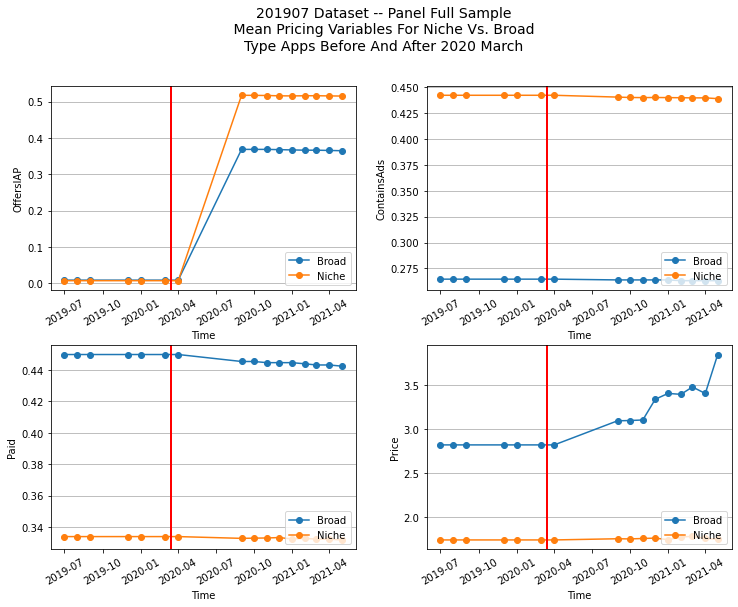

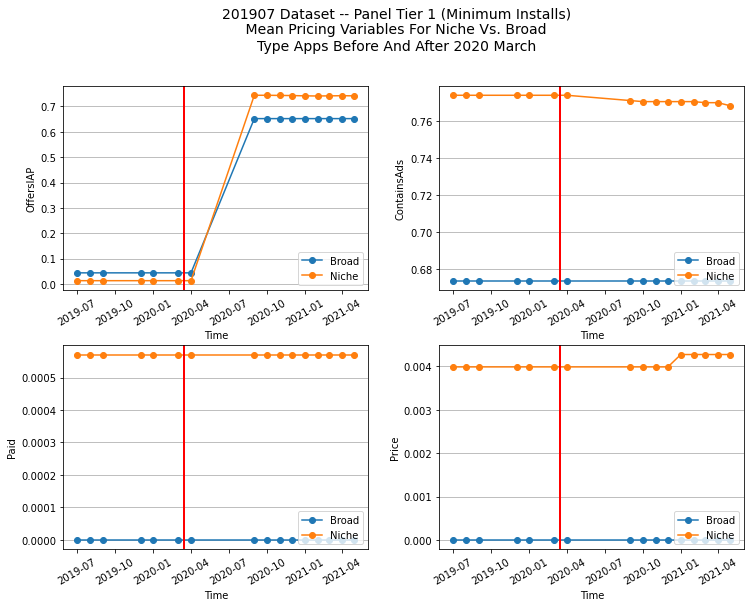

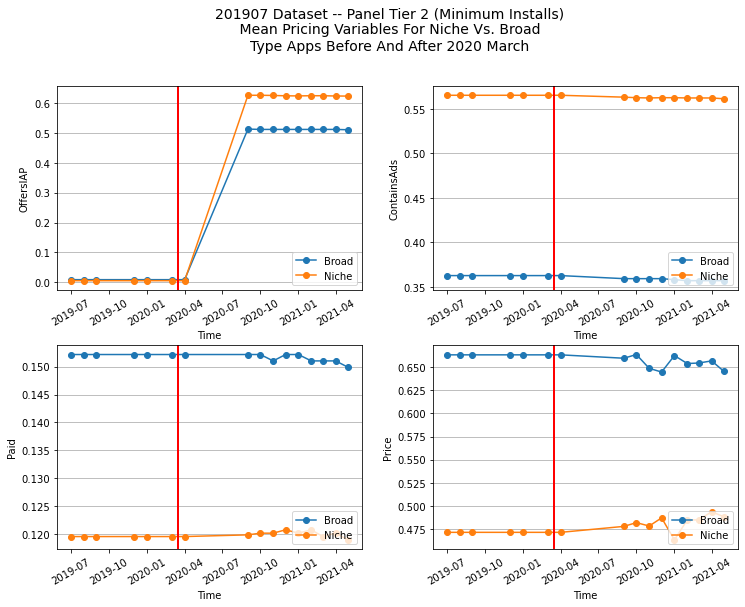

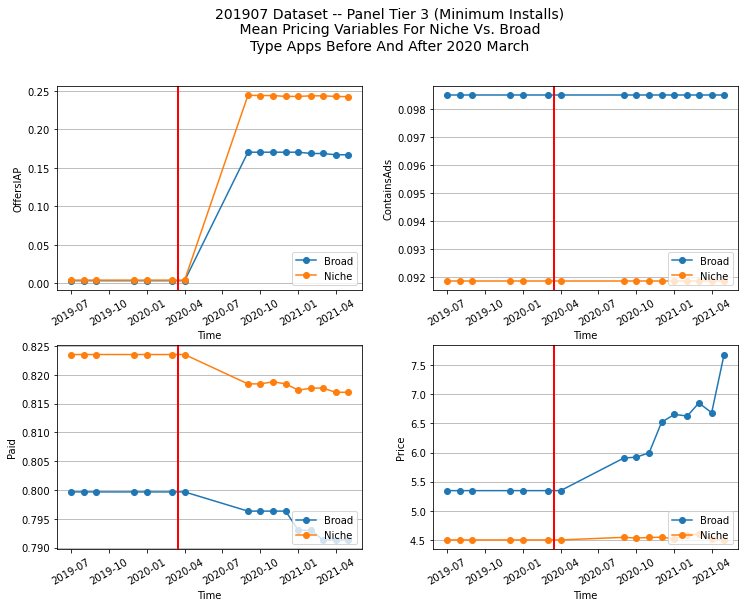

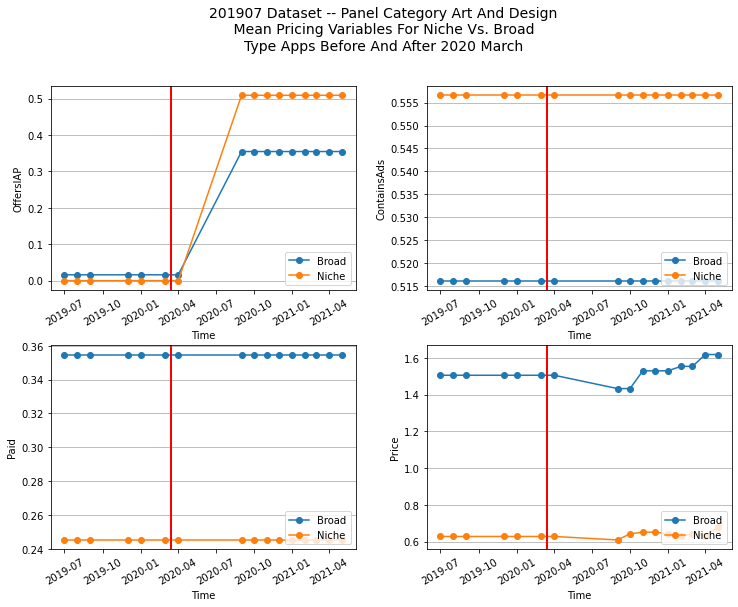

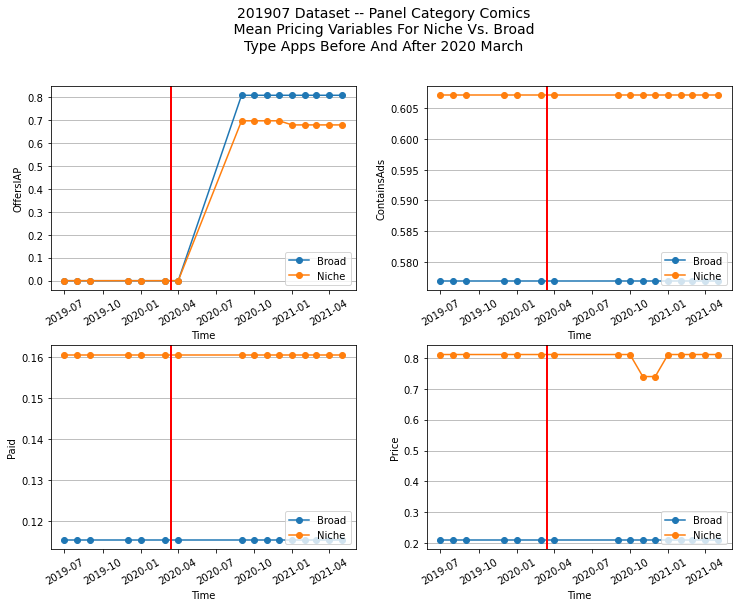

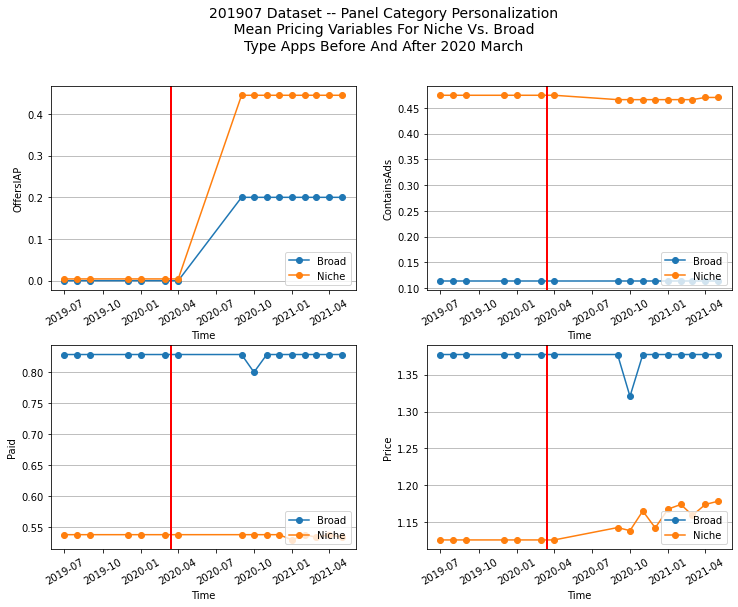

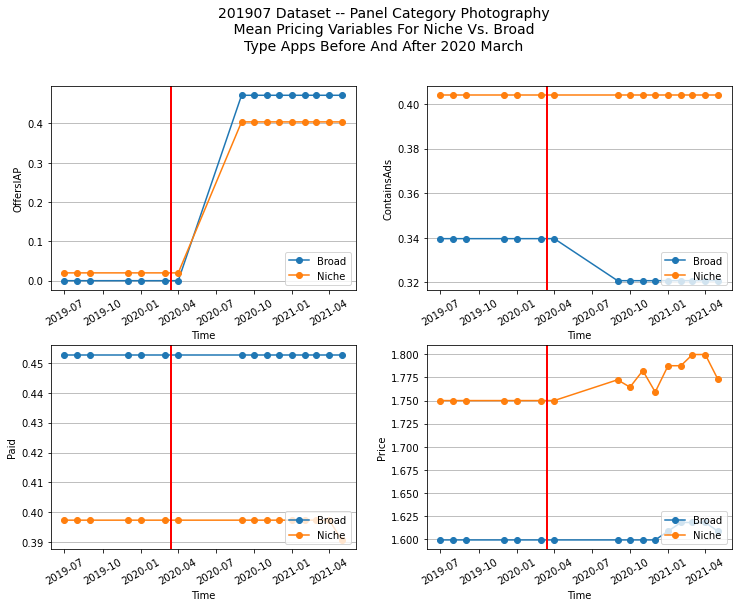

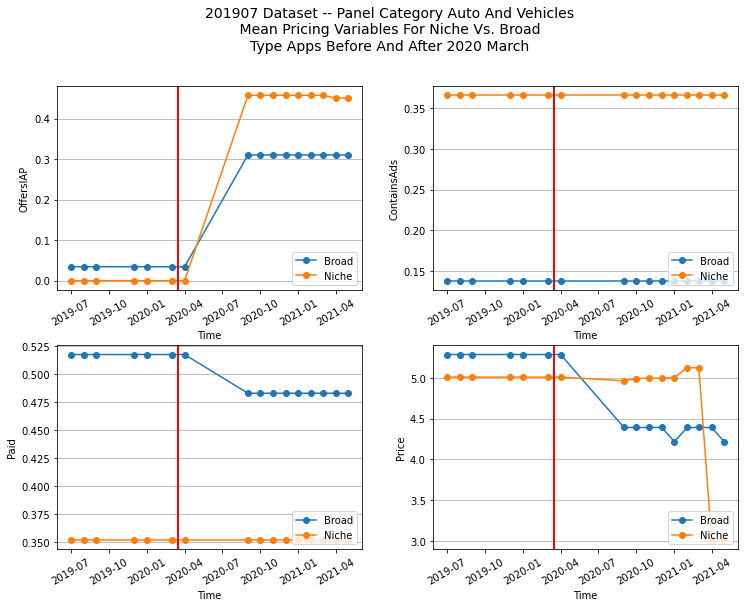

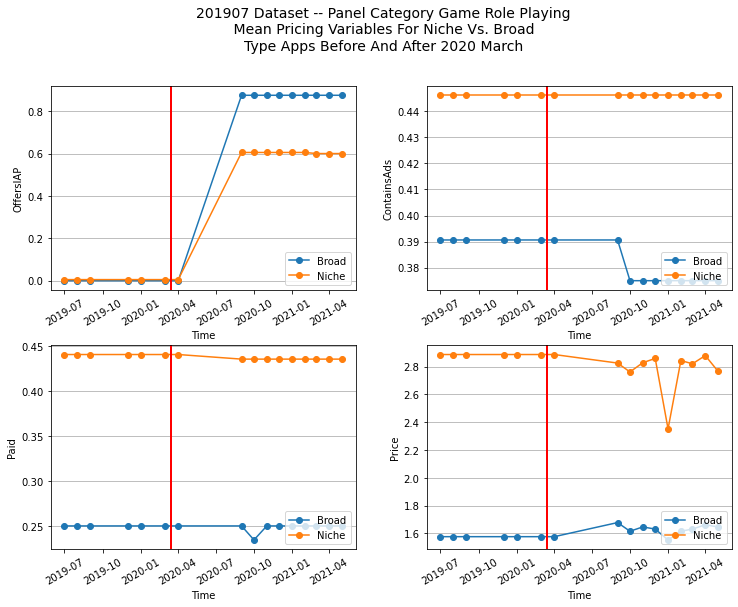

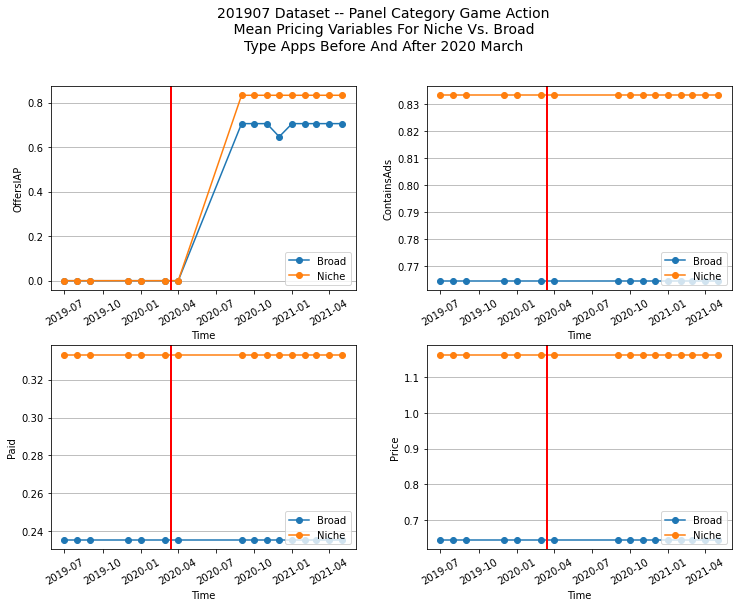

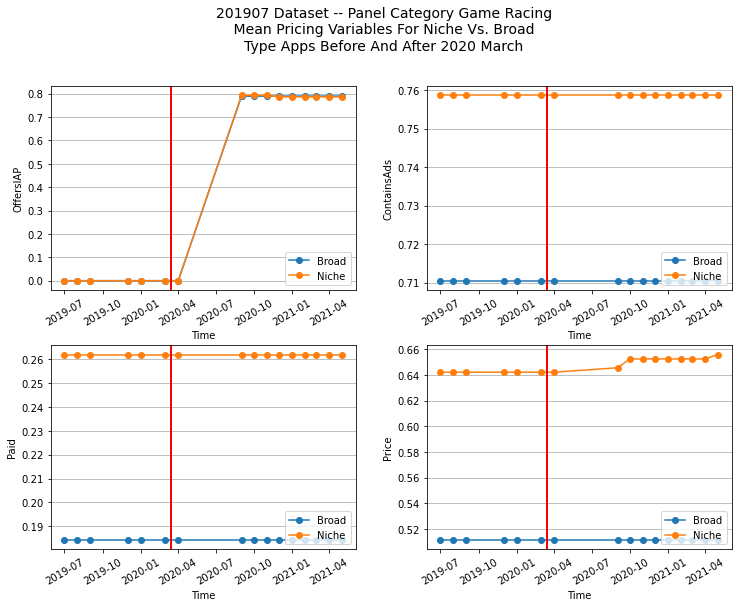

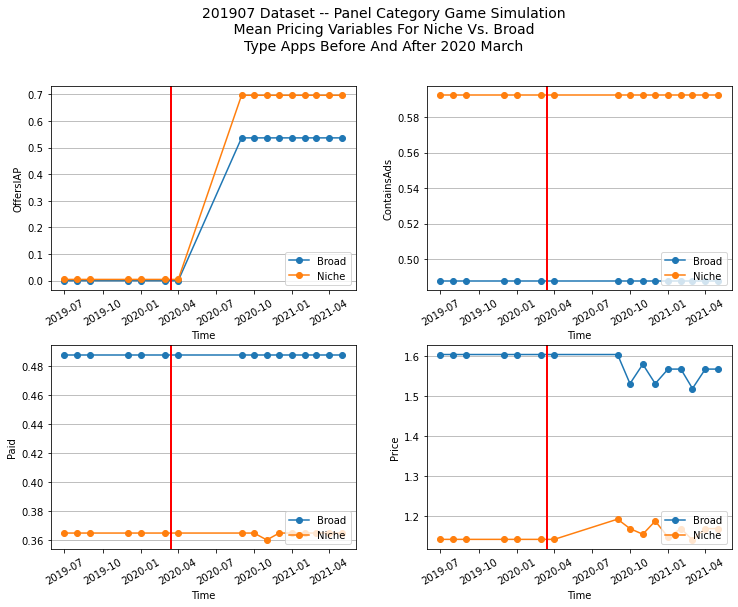

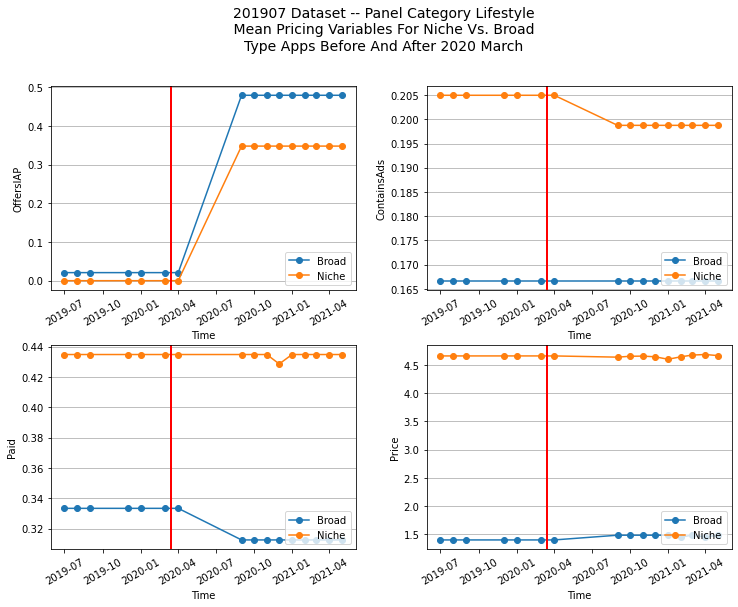

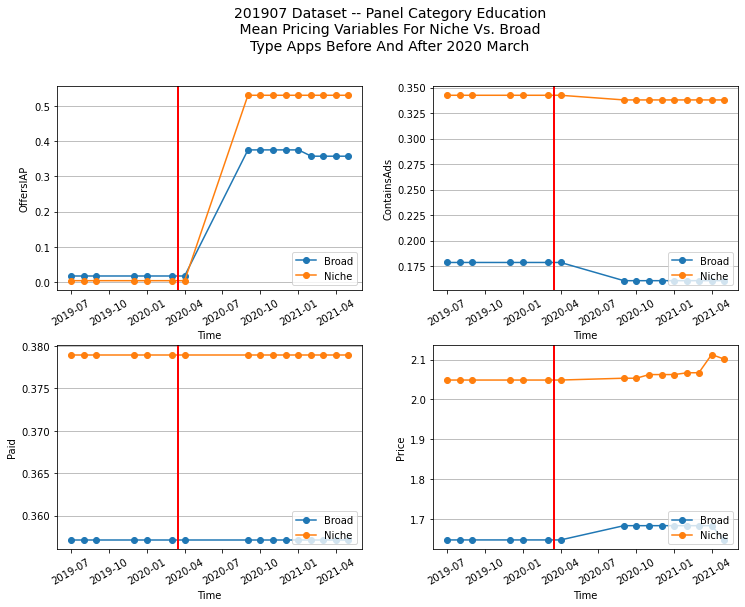

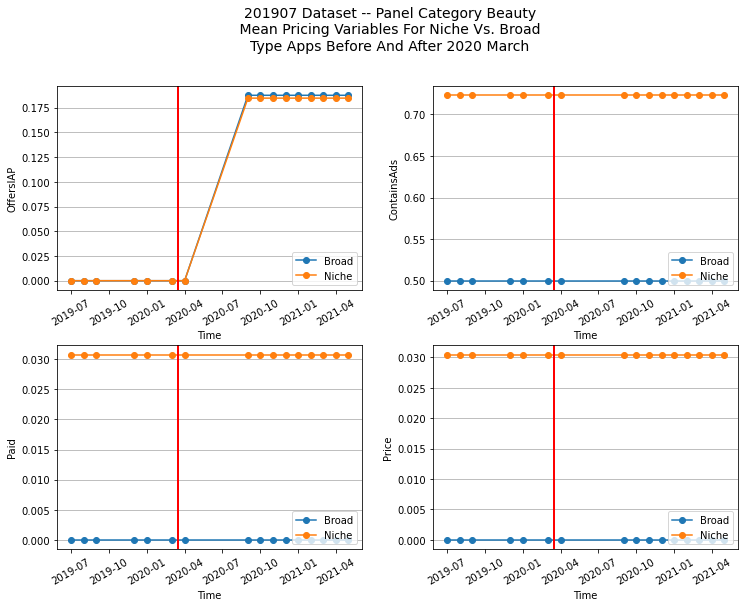

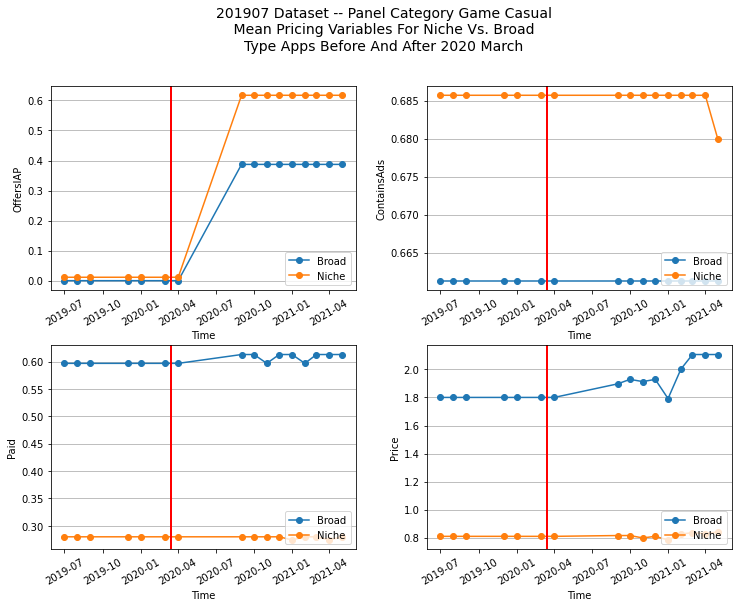

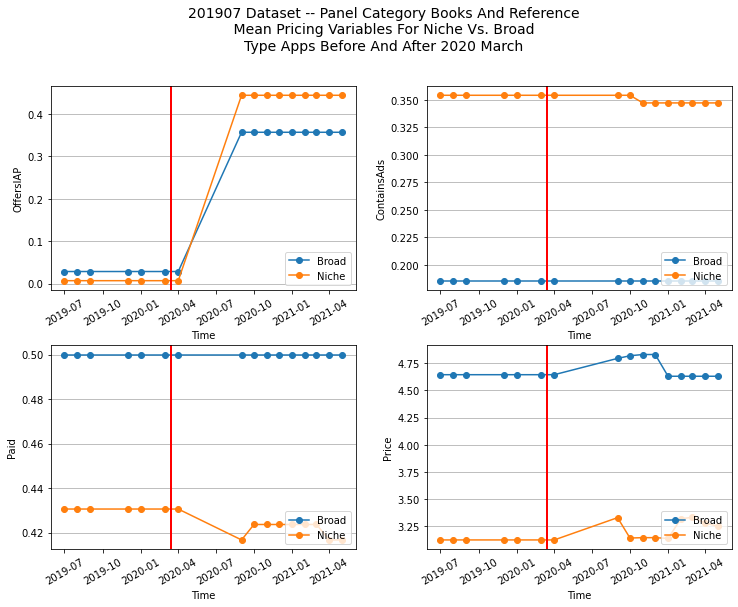

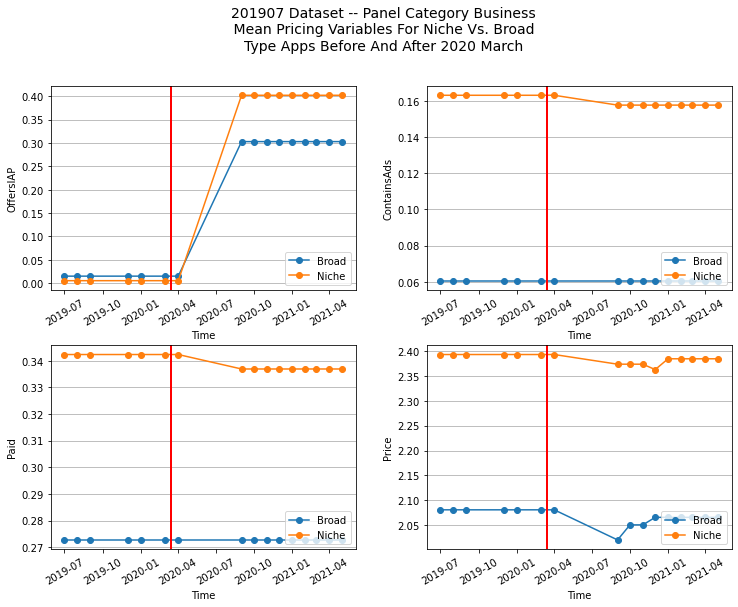

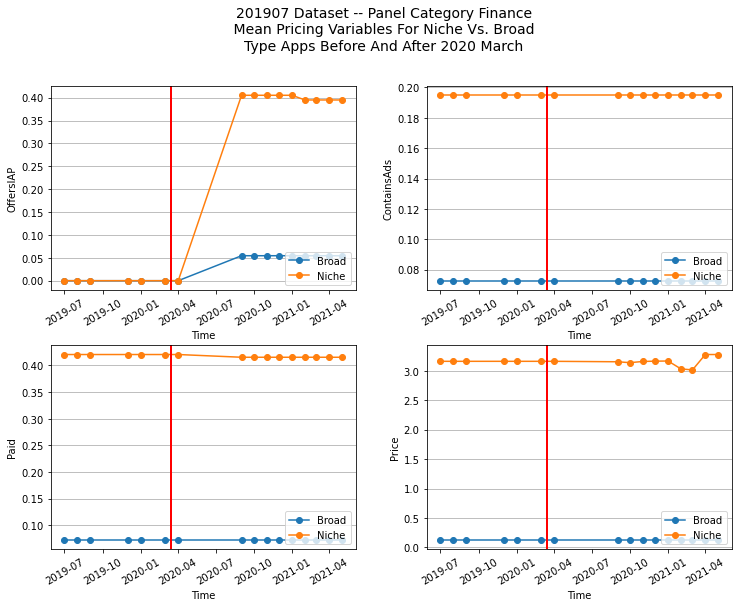

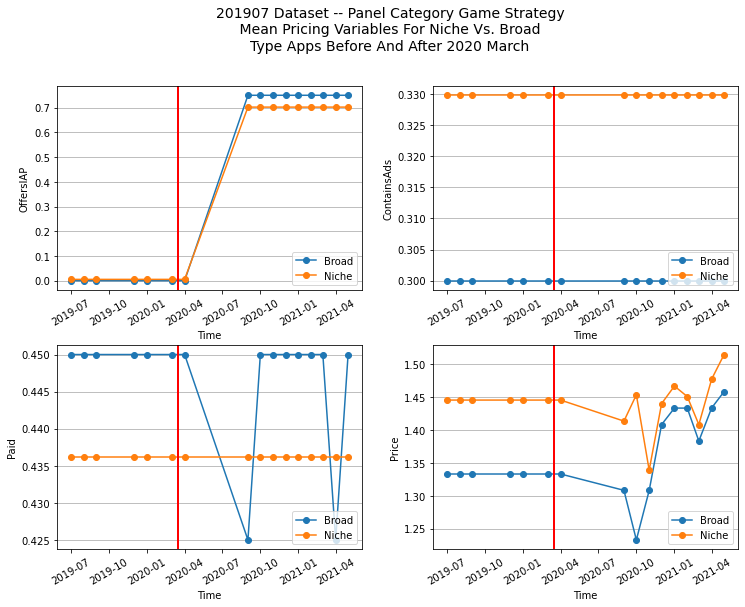

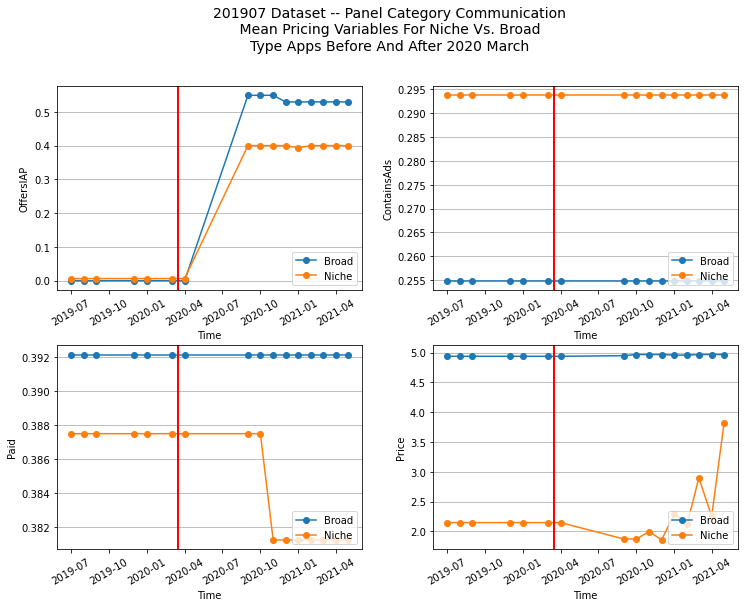

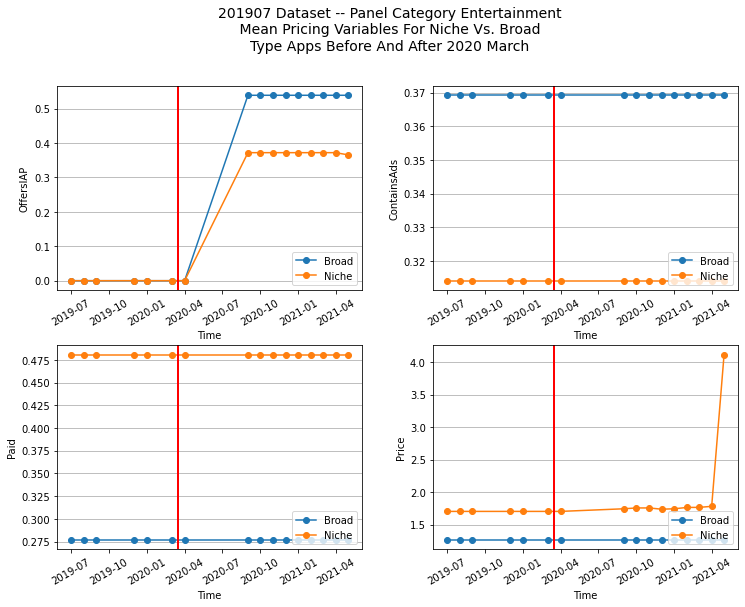

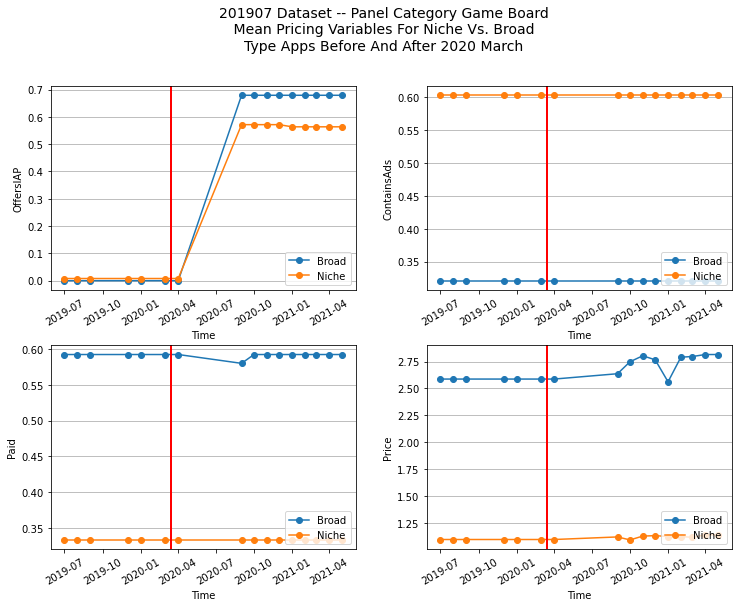

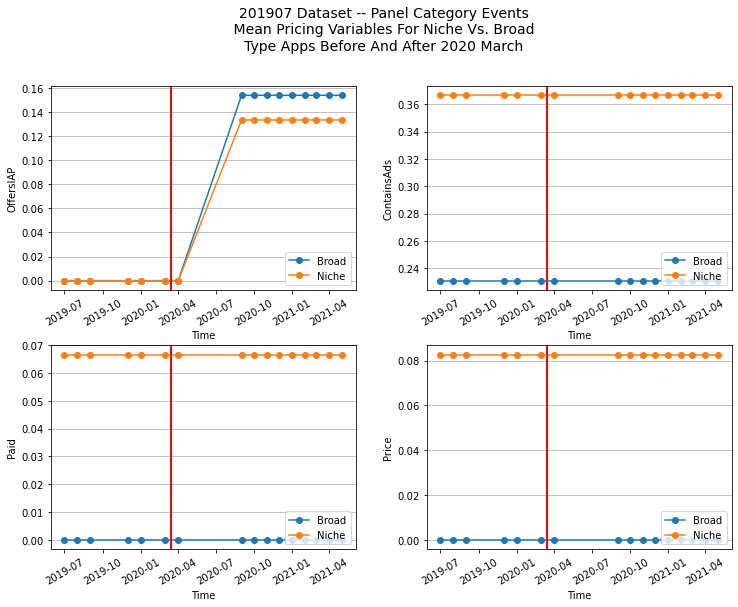

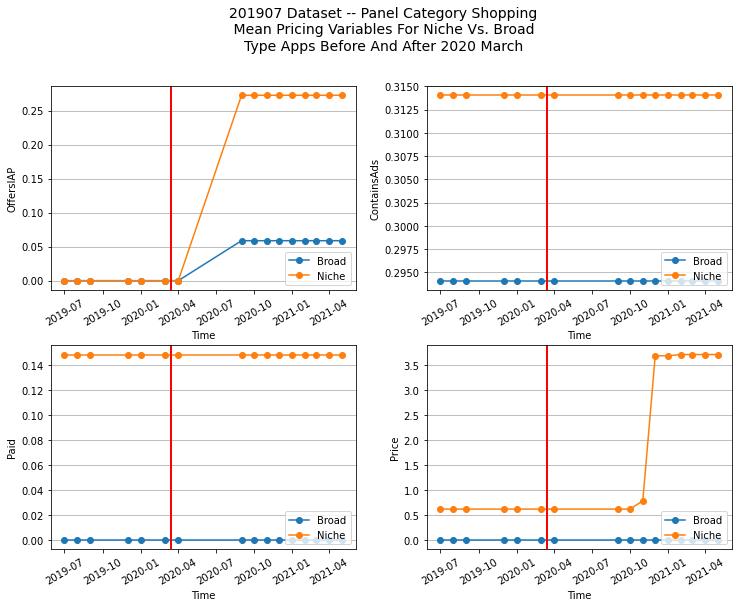

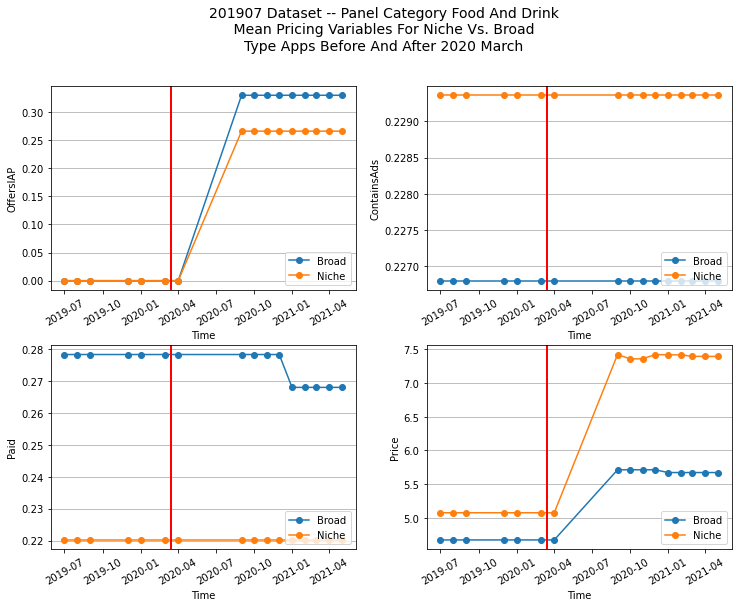

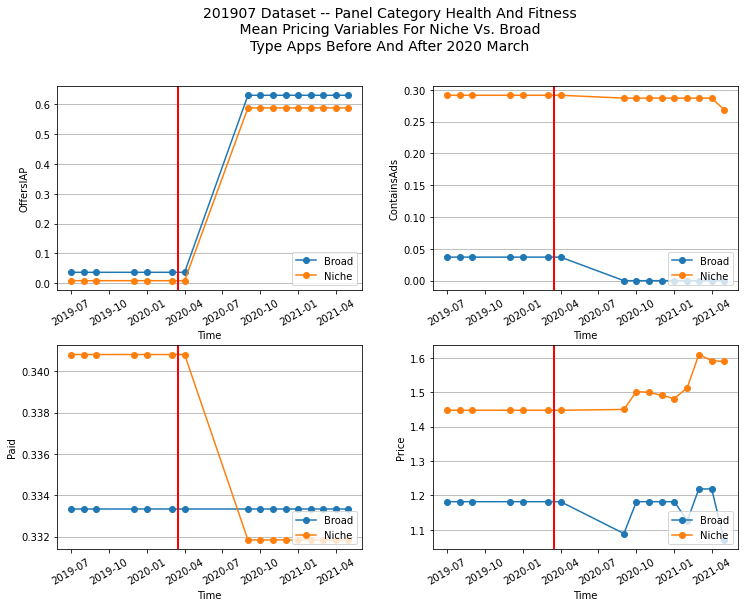

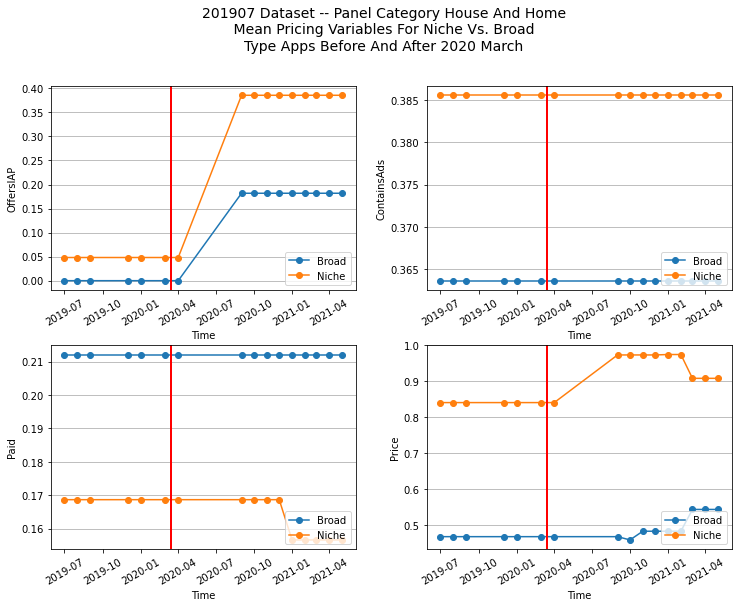

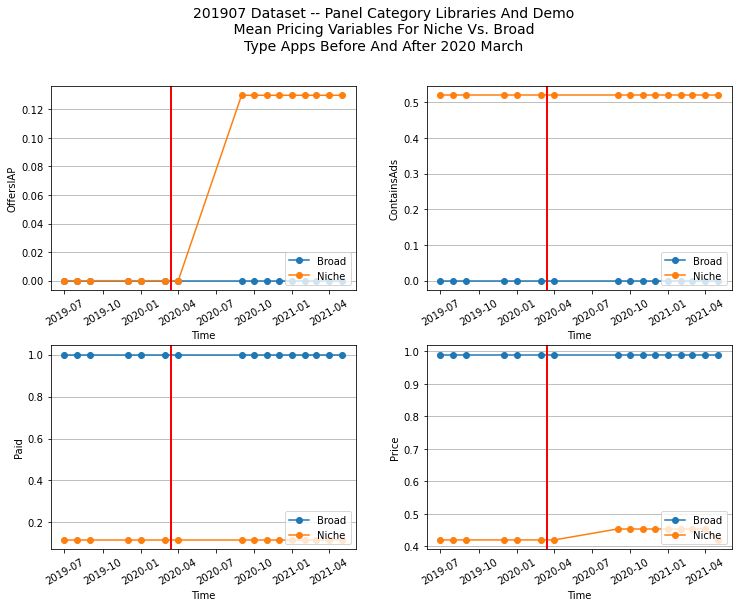

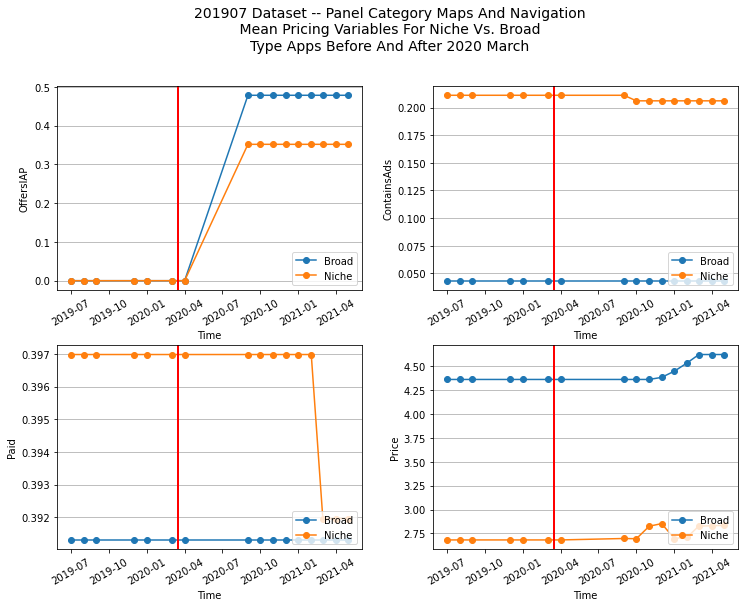

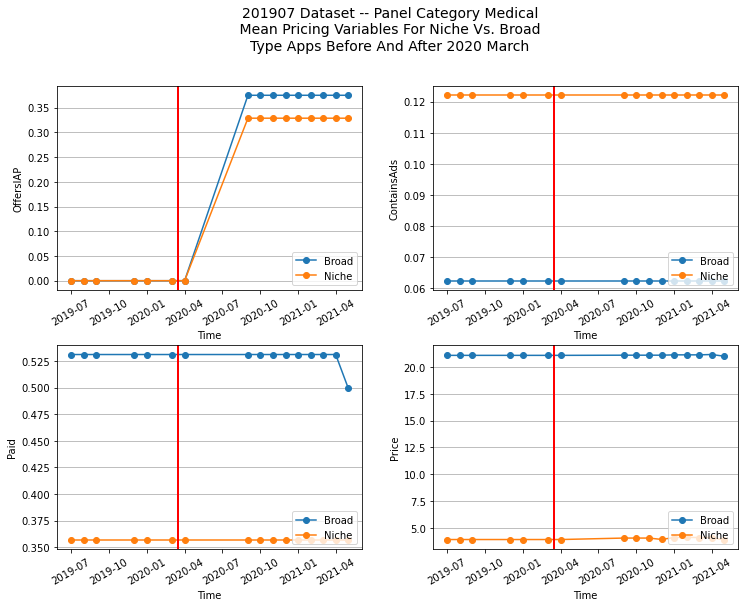

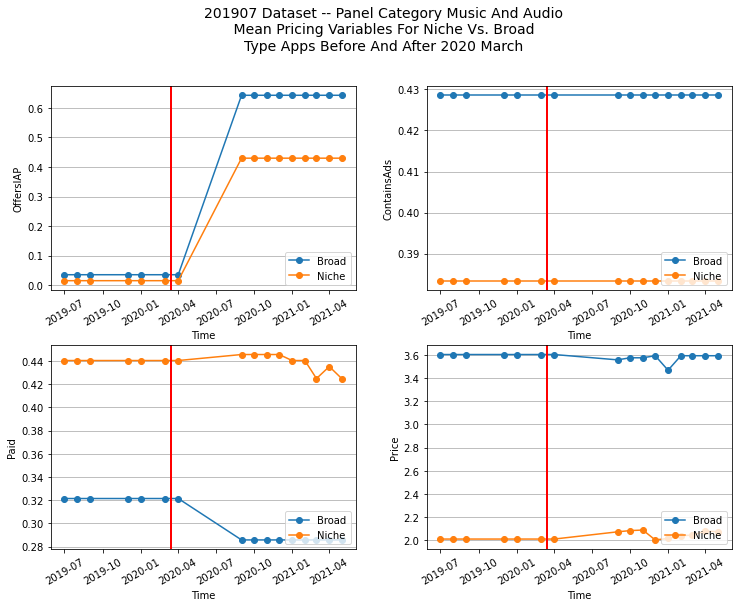

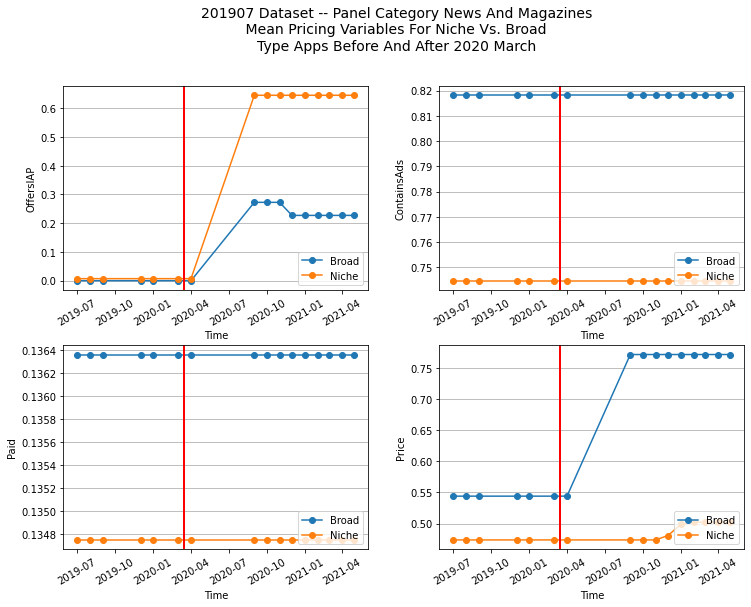

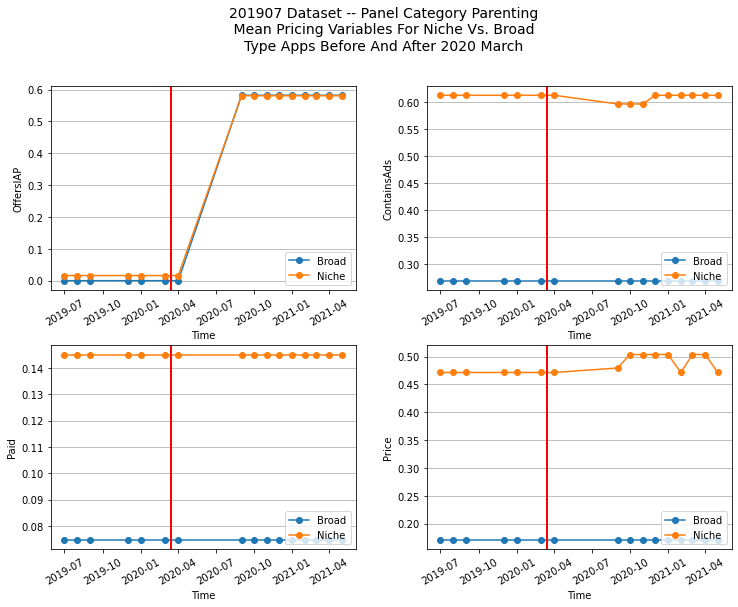

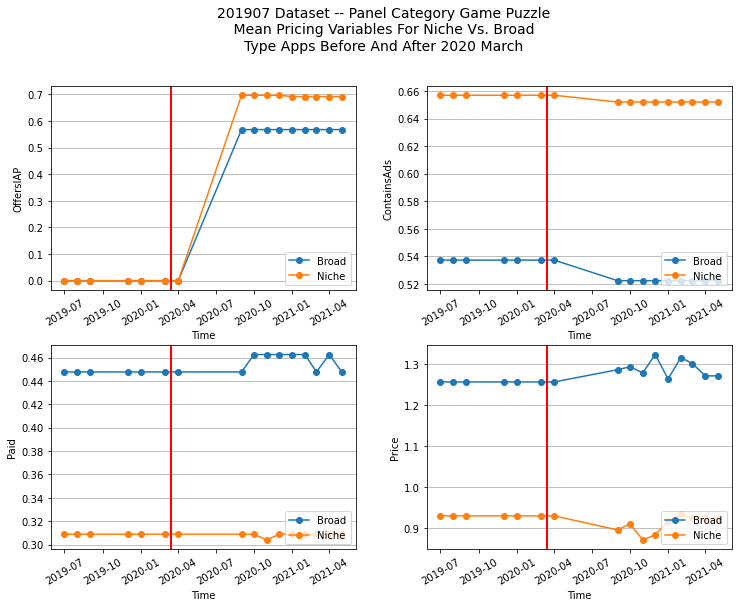

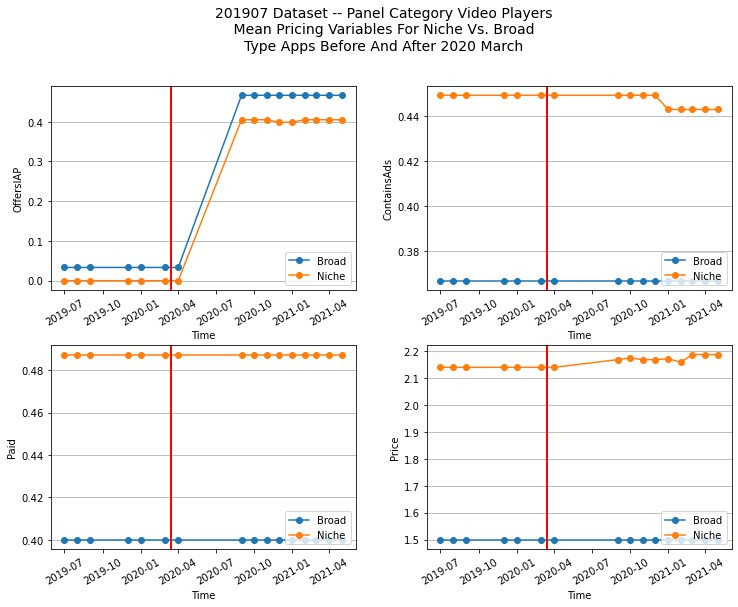

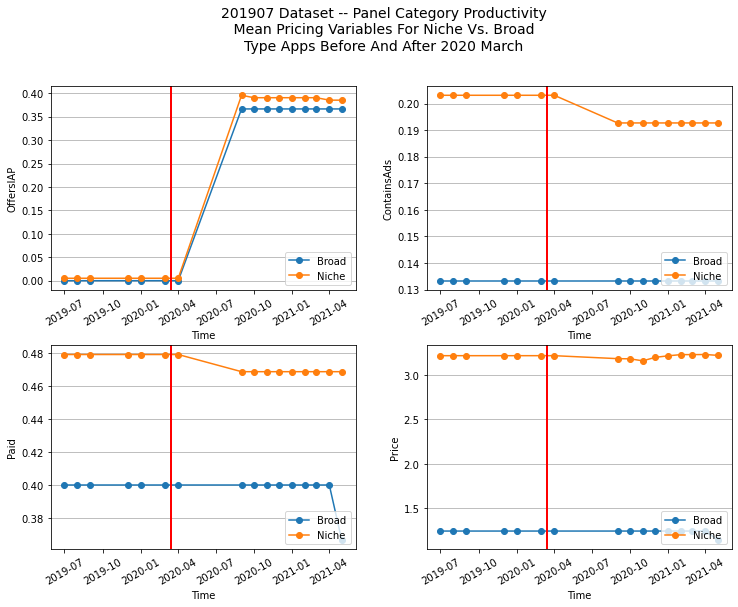

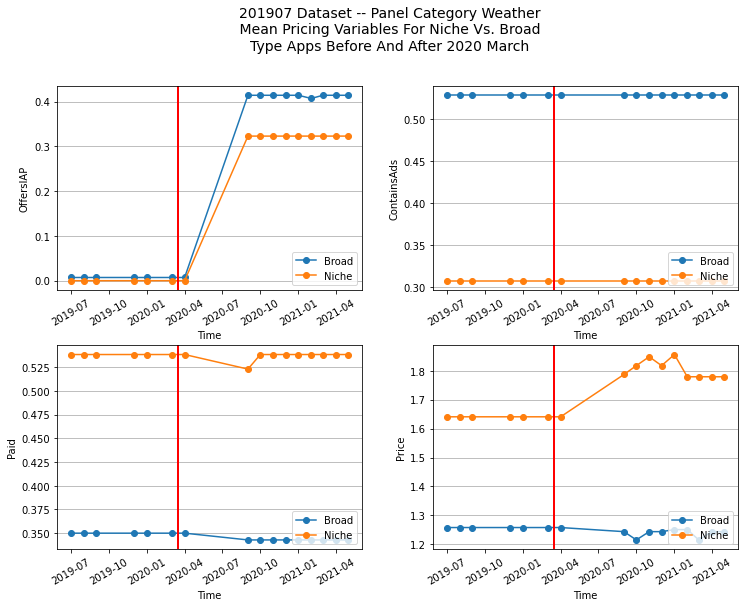

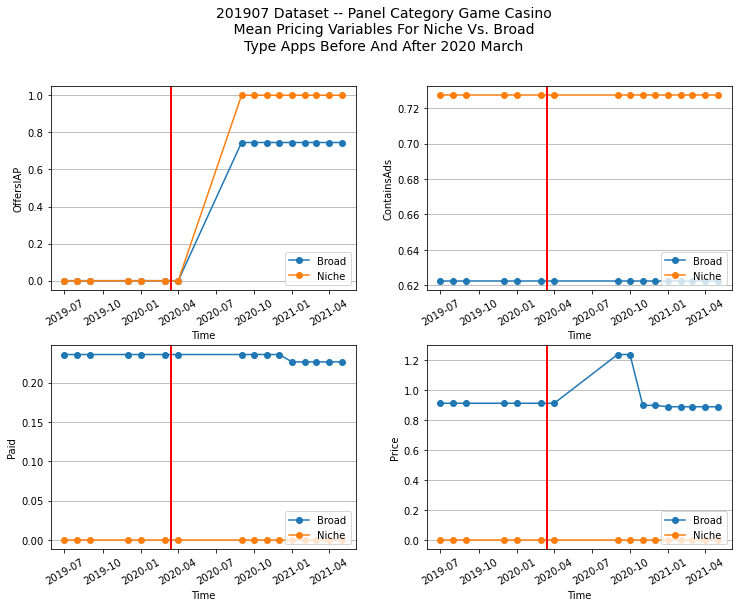

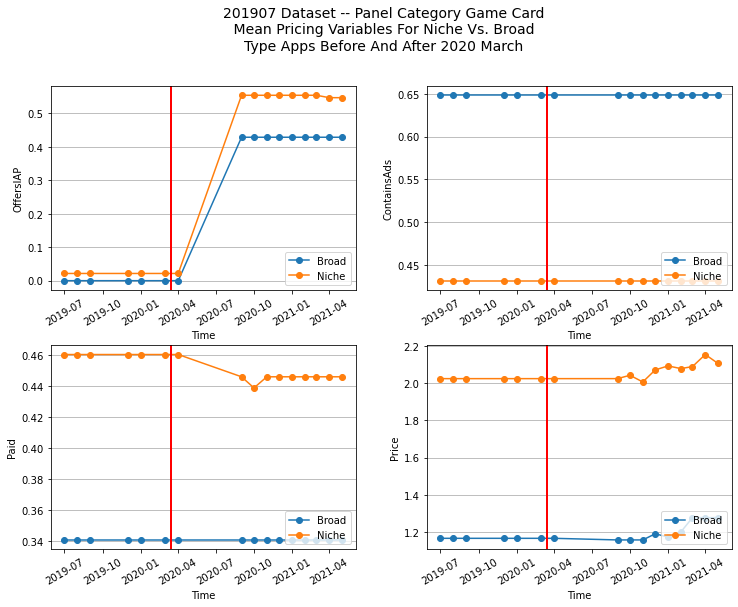

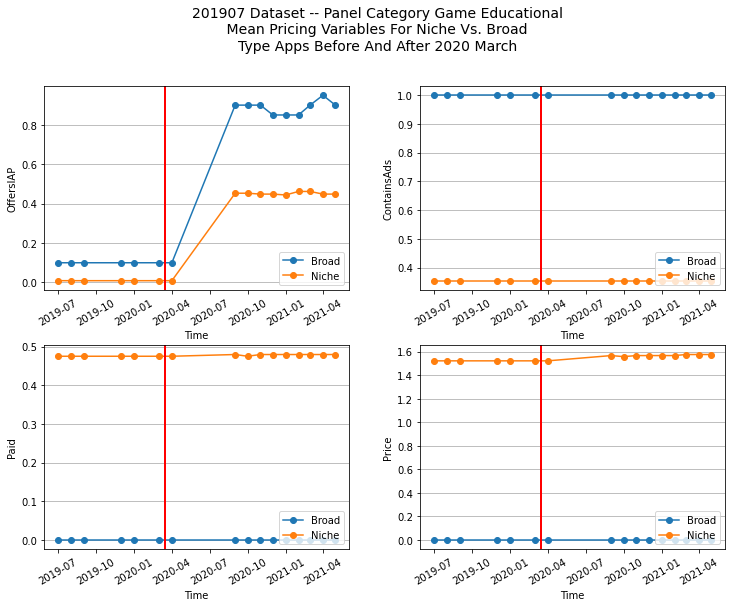

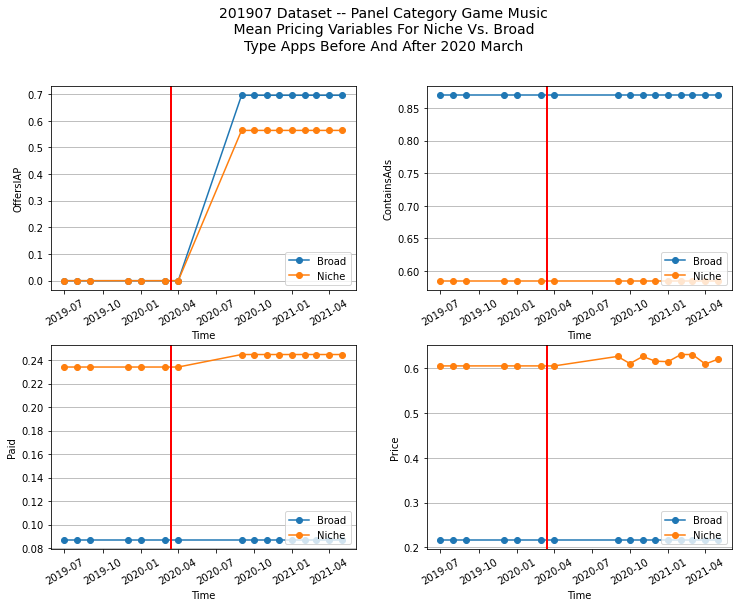

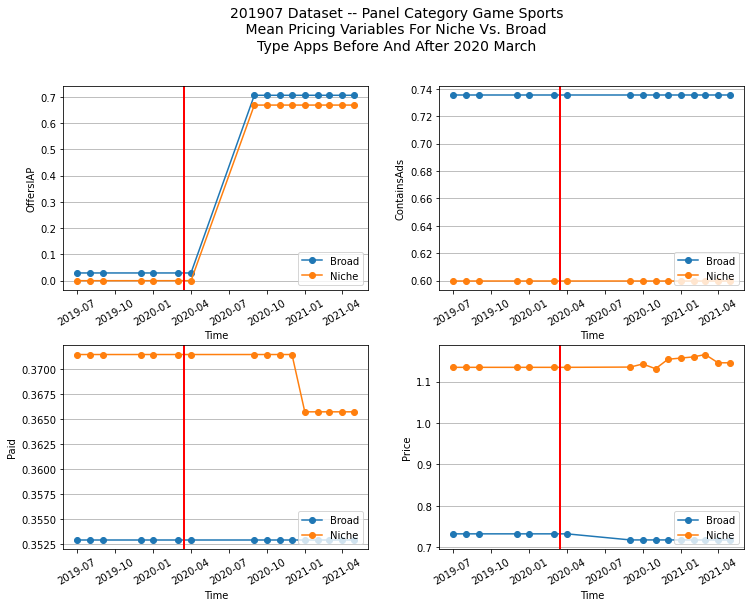

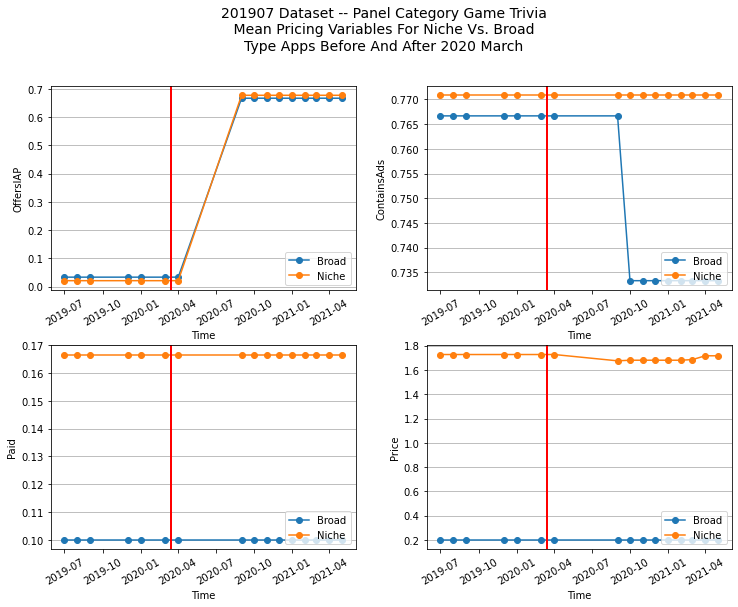

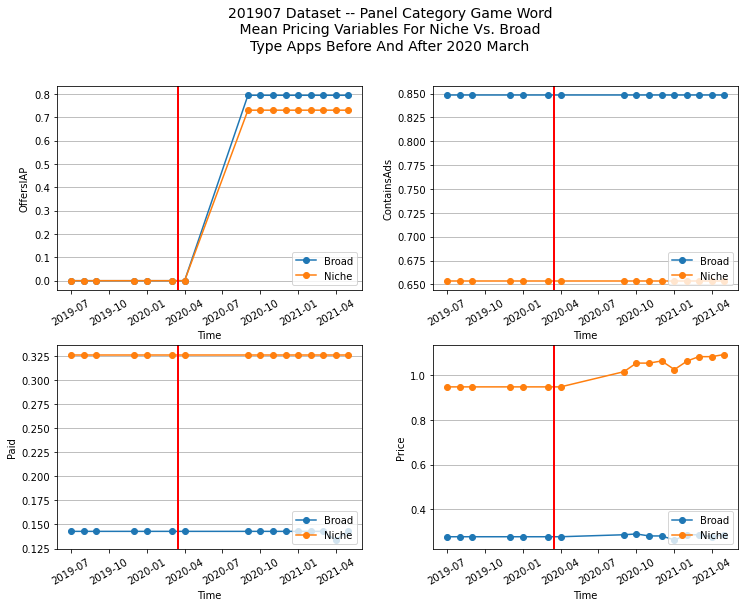

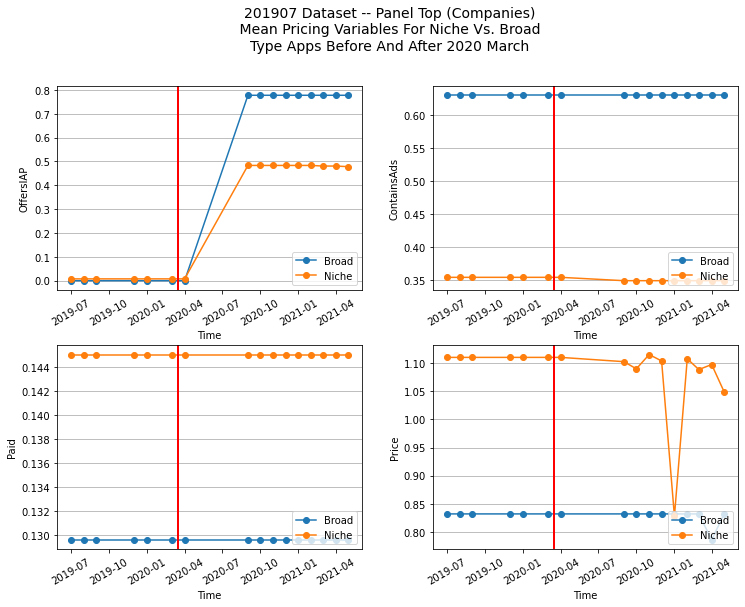

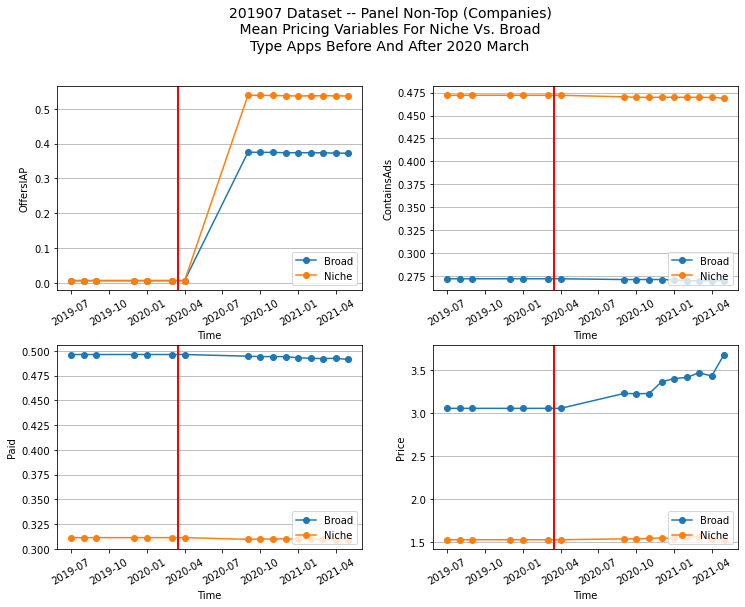

In [2]:
%run -i 'STEP6_Regression.py'

d1 = regression(
         initial_panel=initial_panel,
         all_panels=all_panels,
         dep_vars=dep_vars,
         independent_vars=independent_vars
        ).open_long_df_dict(
        ).add_subsample_names(
        ).select_x_y_for_subsample(
            n_niche_scales=20
        )

d2 = d1.graph_parallel_trend()

In [21]:
testdf = d2[0][1].copy()
print(testdf.dtypes)

index                           object
panel                   datetime64[ns]
containsAdsTrue                  int64
full_full_NicheDummy             int64
dtype: object


# Test Block for Regression

In [3]:
%run -i 'STEP6_ESSAY_1_Regression.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104',
              '202105']
# paidTrue, offersIAP and containsAds are generated according to imputed variables
# to check, please review code in STEP5_Reg_Long_Table_Preparation.py

dep_vars = ['offersIAPTrue',
            'containsAdsTrue',
            'paidTrue',
            'Imputedprice']

independent_vars = [ 'PostDummy',
                     'DeMeanedImputedscore',
                     'DeMeanedminInstallsTop',
                     'DeMeanedminInstallsMiddle',
                     'ZScoreDeMeanedImputedreviews',
                     'contentRatingAdult',
                     'size',
                     'DaysSinceReleased',
                     'top_digital_firms']

In [4]:
# select xy dataframe
%run -i 'STEP6_ESSAY_1_Regression.py'

d1 = regression(
         initial_panel=initial_panel,
         all_panels=all_panels,
         dep_vars=dep_vars,
         independent_vars=independent_vars
        ).open_long_df_dict(
        ).add_subsample_names()

In [5]:
for i in d1.reg_dict['full']['full'].columns:
    for j in d1.reg_dict['full']['full'].index:
        if i == j:
            print(i)

KeyboardInterrupt: 

In [ ]:
.select_x_y_for_subsample(
            n_niche_scales=20,
            individual_dummies=True)

In [7]:
# OLS cross section regression
%run -i 'STEP6_ESSAY_1_Regression.py'

d2 = d1.slice_single_panel(
            the_panel='202105'
        ).all_regressions(
            reg_func = d1._cross_section_regression,
            xy_df=d1.single_panel_df
        ).put_reg_results_into_pandas(
            reg_folder_name='cross_section')

full full NicheDummy
(149088, 15)
(9318, 13)
full full NicheScaleDummies
(149088, 51)
(9318, 31)
minInstalls ImputedminInstalls_tier1 NicheDummy
(28768, 13)
(1798, 11)
minInstalls ImputedminInstalls_tier2 NicheDummy
(66848, 13)
(4178, 11)
minInstalls ImputedminInstalls_tier3 NicheDummy
(53472, 13)
(3342, 11)
genreId ART_AND_DESIGN NicheDummy
(2688, 15)
(168, 13)
genreId COMICS NicheDummy
(1312, 13)
(82, 11)
genreId PERSONALIZATION NicheDummy
(4336, 15)
(271, 13)
genreId PHOTOGRAPHY NicheDummy
(3264, 15)
(204, 13)
genreId AUTO_AND_VEHICLES NicheDummy
(2736, 14)
(171, 12)
genreId GAME_ROLE_PLAYING NicheDummy
(4144, 15)
(259, 13)
genreId GAME_ACTION NicheDummy
(368, 13)
(23, 11)
genreId GAME_RACING NicheDummy
(2928, 15)
(183, 13)
genreId TRAVEL_AND_LOCAL NicheDummy
(3408, 14)
(213, 12)
genreId GAME_ADVENTURE NicheDummy
(3520, 15)
(220, 13)
genreId SOCIAL NicheDummy
(2288, 15)
(143, 13)
genreId GAME_SIMULATION NicheDummy
(4032, 15)
(252, 13)
genreId LIFESTYLE NicheDummy
(3344, 15)
(209, 13

/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1908: RuntimeWarning: divide by zero encountered in true_divide
  self.het_scale = (self.wresid / (1 - h))**2


finished regressing on  genreId HEALTH_AND_FITNESS NicheDummy Imputedprice
start regressing on  genreId HOUSE_AND_HOME NicheDummy offersIAPTrue
finished regressing on  genreId HOUSE_AND_HOME NicheDummy offersIAPTrue
start regressing on  genreId HOUSE_AND_HOME NicheDummy containsAdsTrue
finished regressing on  genreId HOUSE_AND_HOME NicheDummy containsAdsTrue
start regressing on  genreId HOUSE_AND_HOME NicheDummy paidTrue
finished regressing on  genreId HOUSE_AND_HOME NicheDummy paidTrue
start regressing on  genreId HOUSE_AND_HOME NicheDummy Imputedprice
finished regressing on  genreId HOUSE_AND_HOME NicheDummy Imputedprice
start regressing on  genreId TOOLS NicheDummy offersIAPTrue
finished regressing on  genreId TOOLS NicheDummy offersIAPTrue
start regressing on  genreId TOOLS NicheDummy containsAdsTrue
finished regressing on  genreId TOOLS NicheDummy containsAdsTrue
start regressing on  genreId TOOLS NicheDummy paidTrue
finished regressing on  genreId TOOLS NicheDummy paidTrue
start 

In [8]:
# panel regression
%run -i 'STEP6_ESSAY_1_Regression.py'

d2 = d1.all_regressions(
            reg_func = d1._panel_regression,
            xy_df=d1.reg_dict_xy
        ).put_reg_results_into_pandas(
            reg_folder_name='panel')

start regressing on  full full NicheDummy offersIAPTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheDummy offersIAPTrue
start regressing on  full full NicheDummy containsAdsTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheDummy containsAdsTrue
start regressing on  full full NicheDummy paidTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheDummy paidTrue
start regressing on  full full NicheDummy Imputedprice
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheDummy Imputedprice
start regressing on  full full NicheScaleDummies offersIAPTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheScaleDummies offersIAPTrue
start regressing on  full full NicheScaleDummies containsAdsTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheScaleDummies containsAdsTru

/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/linearmodels/panel/results.py:84: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


In [ ]:
# panel regression with individual dummies
%run -i 'STEP6_ESSAY_1_Regression.py'

d2 = d1.all_regressions(
            reg_func = d1._panel_regression,
            xy_df=d1.reg_dict_xy
        ).put_reg_results_into_pandas(
            reg_folder_name='panel')

# Test Block for Latex Tables


In [1]:
%run -i 'STEP6_ESSAY_1_Regression.py'
initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104',
              '202105']
# paidTrue, offersIAP and containsAds are generated according to imputed variables
# to check, please review code in STEP5_Reg_Long_Table_Preparation.py

dep_vars = ['offersIAPTrue',
            'containsAdsTrue',
            'paidTrue',
            'Imputedprice']

independent_vars = [ 'PostDummy',
                     'DeMeanedImputedscore',
                     'DeMeanedminInstallsTop',
                     'DeMeanedminInstallsMiddle',
                     'ZScoreDeMeanedImputedreviews',
                     'contentRatingAdult',
                     'size',
                     'DaysSinceReleased',
                     'top_digital_firms']

In [3]:
# block for variable definitions
%run -i 'STEP6_ESSAY_1_Regression.py'

d1 = regression(
         initial_panel=initial_panel,
         all_panels=all_panels,
         dep_vars=dep_vars,
         independent_vars=independent_vars
        )

d2 = d1.create_var_definition_latex()

In [5]:
# block for descriptive stats of variables (in variable definition)
%run -i 'STEP6_ESSAY_1_Regression.py'

d1 = regression(
         initial_panel=initial_panel,
         all_panels=all_panels,
         dep_vars=dep_vars,
         independent_vars=independent_vars
        )

d2 = d1.open_long_df_dict(
        ).add_subsample_names(
        ).slice_single_panel_descriptive_stats(
            the_panel='202105',
            var_list = [ 'containsAdsTrue',
                         'offersIAPTrue',
                         'paidTrue',
                         'contentRatingAdult',
                         'top_digital_firms',
                         'Imputedprice',
                         'Imputedscore',
                         'DeMeanedImputedscore',
                         'Imputedreviews',
                         'ZScoreDeMeanedImputedreviews',
                         'minInstallsTop',
                         'DeMeanedminInstallsTop',
                         'minInstallsMiddle',
                         'DeMeanedminInstallsMiddle',
                         'size',
                         'DaysSinceReleased']
        ).single_panel_descriptive_stats(
            type='dummy',
            var_list=['containsAdsTrue',
                        'offersIAPTrue',
                        'paidTrue',
                        'contentRatingAdult',
                        'top_digital_firms',
                        'NicheDummy',
                        'minInstallsTop',
                        'minInstallsMiddle'],
            the_panel='202105'
        ).single_panel_descriptive_stats(
            type='continuous',
            var_list=[ 'Imputedprice',
                       'Imputedscore',
                       'Imputedreviews',
                       'size',
                       'DaysSinceReleased'],
            the_panel='202105'
        ).single_panel_descriptive_stats(
            type='demeaned',
            var_list=[ 'DeMeanedImputedscore',
                       'ZScoreDeMeanedImputedreviews',
                       'DeMeanedminInstallsTop',
                       'DeMeanedminInstallsMiddle'],
            the_panel='202105'
        ).export_descriptive_stats_to_latex(
            the_panel='202105')

/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
%run -i 'STEP6_ESSAY_1_Regression.py'

d1 = regression(
         initial_panel=initial_panel,
         all_panels=all_panels,
         dep_vars=dep_vars,
         independent_vars=independent_vars
        )

df_list = []
for result_type in ['panel', 'cross_section']:
    for table_type in ['table_1', 'table_2', 'table_3']:
        df = d1.select_cols_and_rows_result_PostXNicheDummy(
            result_type=result_type,
            table_type=table_type
        )
        dfs = d1.add_pvalue_asterisk_to_results(df)
        dfs2 = d1.set_row_and_column_groups(
            df=dfs,
            result_type=result_type)
        dfs2 = d1.convert_to_latex(
            df=dfs2,
            result_type=result_type,
            table_type=table_type)
        df_list.append(dfs2)

/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [10]:
dfs2 = d1.set_row_and_column_groups(
            df=dfs,
            result_type=result_type)
dfs2 = d1.convert_to_latex(
            df=dfs2,
            result_type=result_type,
            table_type=table_type)

/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
